# 1. Importing packages

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import arff
from typing import Tuple, Dict
import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading

In [2]:
DATA_DIR = "data"

In [3]:
def load_insurance_data():
    freq_path = os.path.join(DATA_DIR, "freMTPL2freq.arff")
    sev_path = os.path.join(DATA_DIR, "freMTPL2sev.arff")
    
    data_freq = arff.load(freq_path)
    data_sev = arff.load(sev_path)
    
    df_freq = pd.DataFrame(
        data_freq,
        columns=[
            "IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
            "VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas",
            "Density", "Region"
        ]
    )
    
    df_sev = pd.DataFrame(
        data_sev,
        columns=["IDpol", "ClaimAmount"]
    )
    
    return df_freq, df_sev

df_freq, df_sev = load_insurance_data()

# 3. Explorative Data Analysis

In [4]:
print("Dataframe Shapes:")
print(df_freq.shape)
print(df_sev.shape)

Dataframe Shapes:
(678013, 12)
(26639, 2)


In [5]:
print("\nDataframe Info:")
print(df_freq.info())
print(df_sev.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  

In [6]:
print("\nBase Statistics:")
print(df_freq.describe())
print(df_sev.describe())


Base Statistics:
              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528750       6.454631   
std    1.641783e+06       0.240117       0.364442       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.000000   
max    6.114330e+06      16.000000       2.010000      15.000000   

              VehAge        DrivAge     BonusMalus        Density  
count  678013.000000  678013.000000  678013.000000  678013.000000  
mean        7.044265      45.499122      59.761502    1792.422405  
std         5.666232      14.137444      15.636658    3958.646564  
min         0.000000      18.000000      50.000000       1.000000  
25%         2.000000      34.

In [7]:
df_freq.head(n=10)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
5,13.0,1.0,0.52,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31'
6,15.0,1.0,0.45,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31'
7,17.0,1.0,0.27,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91'
8,18.0,1.0,0.71,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91'
9,21.0,1.0,0.15,'B',7.0,0.0,41.0,50.0,'B12',Diesel,60.0,'R52'


In [8]:
df_sev.head(n=10)

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00
5,4073956.0,1204.00
6,4012173.0,1204.00
7,4020812.0,54942.62
8,4020812.0,7620.00
9,4074074.0,1204.00


In [9]:
def print_unique_values(df):
    cols = ['Area', 'VehPower', 'VehBrand', 'VehGas', 'Region']
    for col in cols:
        print(f"\n{col} unique values:", df[col].value_counts())

print_unique_values(df_freq)


Area unique values: Area
'C'    191880
'D'    151596
'E'    137167
'A'    103957
'B'     75459
'F'     17954
Name: count, dtype: int64

VehPower unique values: VehPower
6.0     148976
7.0     145401
5.0     124821
4.0     115349
8.0      46956
10.0     31354
9.0      30085
11.0     18352
12.0      8214
13.0      3229
15.0      2926
14.0      2350
Name: count, dtype: int64

VehBrand unique values: VehBrand
'B12'    166024
'B1'     162736
'B2'     159861
'B3'      53395
'B5'      34753
'B6'      28548
'B4'      25179
'B10'     17707
'B11'     13585
'B13'     12178
'B14'      4047
Name: count, dtype: int64

VehGas unique values: VehGas
Regular    345877
Diesel     332136
Name: count, dtype: int64

Region unique values: Region
'R24'    160601
'R82'     84752
'R93'     79315
'R11'     69791
'R53'     42122
'R52'     38751
'R91'     35805
'R72'     31329
'R31'     27285
'R54'     19046
'R73'     17141
'R41'     12990
'R25'     10893
'R26'     10492
'R23'      8784
'R22'      7994
'R83'     

In [10]:
for col in ['VehAge', 'DrivAge']:
    # Get the difference between each value and its rounded version
    diff_from_integer = abs(df_freq[col] - df_freq[col].round())
    # Check if all differences are tiny (less than 1e-6)
    is_essentially_integer = (diff_from_integer < 1e-6).all()
    # Grab some interesting examples where the difference isn't zero
    non_integer_examples = df_freq[diff_from_integer > 0].head(3)
    
    print(f"\n{col}:")
    print(f"Values essentially integers? {is_essentially_integer}")
    if not non_integer_examples.empty:
        print("Examples of non-integer-like values:")
        for val in non_integer_examples[col]:
            print(f"  {val} (diff from nearest integer: {abs(val - round(val))})")


VehAge:
Values essentially integers? True

DrivAge:
Values essentially integers? True


In [11]:
df_freq['ClaimNb'].value_counts().sort_index()

ClaimNb
0.0     643953
1.0      32178
2.0       1784
3.0         82
4.0          7
5.0          2
6.0          1
8.0          1
9.0          1
11.0         3
16.0         1
Name: count, dtype: int64

In [12]:
from enum import Enum

class FreqColumns(Enum):
    """
    Spaltennamen für den Häufigkeits-Datensatz (freMTPL2freq).
    """
    ID = 'IDpol'                  # Eindeutige Identifikationsnummer der Police
    CLAIM_COUNT = 'ClaimNb'       # Anzahl der Schäden im Versicherungszeitraum
    EXPOSURE = 'Exposure'         # Versicherungszeitraum in Jahren
    AREA = 'Area'                 # Gebiets-Code des Versicherungsnehmers
    VEHICLE_POWER = 'VehPower'    # Motorleistung des versicherten Fahrzeugs
    VEHICLE_AGE = 'VehAge'        # Alter des versicherten Fahrzeugs
    DRIVER_AGE = 'DrivAge'        # Alter des Versicherungsnehmers
    BONUS_MALUS = 'BonusMalus'    # Schadenfreiheitsklasse (französisches System)
    VEHICLE_BRAND = 'VehBrand'    # Marke des versicherten Fahrzeugs
    VEHICLE_GAS = 'VehGas'        # Antriebsart des Fahrzeugs
    DENSITY = 'Density'           # Einwohnerdichte am Wohnort (Einwohner/km²)
    REGION = 'Region'             # Region des Versicherungsnehmers


class SevColumns(Enum):
    """
    Spaltennamen für den SEV-Datensatz (freMTPL2sev).
    """
    ID = 'IDpol'                  # Eindeutige Identifikationsnummer der Police
    CLAIM_AMOUNT = 'ClaimAmount'  # Schadenhöhe in Euro


class DerivedColumns(Enum):
    """
    Abgeleitete Spalten, die während der Analyse erstellt werden.
    """
    YEARLY_CLAIM_AMOUNT = 'yearly_claim_amount'  # Jährliche Schadenhöhe (ClaimAmount/Exposure)


# Gruppierung der Spalten nach Datentyp und Verwendungszweck
INTEGER_COLUMNS = [
    FreqColumns.CLAIM_COUNT.value,
    FreqColumns.VEHICLE_AGE.value,
    FreqColumns.DRIVER_AGE.value,
]

NUMERIC_COLUMNS = [
    FreqColumns.EXPOSURE.value,
    FreqColumns.VEHICLE_POWER.value,
    FreqColumns.BONUS_MALUS.value,
    FreqColumns.DENSITY.value,
    SevColumns.CLAIM_AMOUNT.value
]


CATEGORICAL_COLUMNS = [
    FreqColumns.AREA.value,
    FreqColumns.VEHICLE_BRAND.value,
    FreqColumns.VEHICLE_GAS.value,
    FreqColumns.REGION.value
]

ID_COLUMNS = [
    FreqColumns.ID.value,
    SevColumns.ID.value
]

TARGET_DERIVED = DerivedColumns.YEARLY_CLAIM_AMOUNT.value

In [13]:
# Spaltenbeschreibungen für Dokumentation
COLUMN_DESCRIPTIONS = {
    FreqColumns.ID.value: "Eindeutige Identifikationsnummer der Versicherungspolice",
    FreqColumns.CLAIM_COUNT.value: "Anzahl der Schadensfälle während der Versicherungsperiode",
    FreqColumns.EXPOSURE.value: "Dauer der Versicherungsperiode in Jahren",
    FreqColumns.AREA.value: "Geografischer Gebiets-Code des Versicherungsnehmers",
    FreqColumns.VEHICLE_POWER.value: "Motorleistung des versicherten Fahrzeugs",
    FreqColumns.VEHICLE_AGE.value: "Alter des versicherten Fahrzeugs in Jahren",
    FreqColumns.DRIVER_AGE.value: "Alter des Versicherungsnehmers in Jahren",
    FreqColumns.BONUS_MALUS.value: "Schadenfreiheitsklasse nach französischem System",
    FreqColumns.VEHICLE_BRAND.value: "Hersteller des versicherten Fahrzeugs",
    FreqColumns.VEHICLE_GAS.value: "Antriebsart des Fahrzeugs (Benzin/Diesel)",
    FreqColumns.DENSITY.value: "Bevölkerungsdichte am Wohnort (Einwohner pro km²)",
    FreqColumns.REGION.value: "Französische Region des Versicherungsnehmers",
    SevColumns.CLAIM_AMOUNT.value: "Höhe des Schadenaufwands in Euro",
    DerivedColumns.YEARLY_CLAIM_AMOUNT.value: "Durchschnittliche jährliche Schadenhöhe (Schadenaufwand/Versicherungsdauer)"
}

In [14]:
PLOT_DESCRIPTIONS = {
    FreqColumns.ID.value: "Police-ID",
    FreqColumns.CLAIM_COUNT.value: "Anzahl Schäden",
    FreqColumns.EXPOSURE.value: "Versicherungsdauer (Jahre)",
    FreqColumns.AREA.value: "Gebiets-Code",
    FreqColumns.VEHICLE_POWER.value: "KFZ-Leistung",
    FreqColumns.VEHICLE_AGE.value: "KFZ-Alter",
    FreqColumns.DRIVER_AGE.value: "Fahrer-Alter",
    FreqColumns.BONUS_MALUS.value: "Schadenfreiheitsklasse",
    FreqColumns.VEHICLE_BRAND.value: "KFZ-Marke",
    FreqColumns.VEHICLE_GAS.value: "Antriebsart",
    FreqColumns.DENSITY.value: "Einwohner/km²",
    FreqColumns.REGION.value: "Region",
    SevColumns.CLAIM_AMOUNT.value: "Schadenhöhe (€)",
    DerivedColumns.YEARLY_CLAIM_AMOUNT.value: "Jahresschaden (€)"
}

# 4. Merging Datasets

## 4.1 Matching ID Check

First check if the IDs are matching

In [15]:
# Let's do a quick ID analysis
print("=== ID Match Analysis ===")

# Get our IDs
freq_ids = set(df_freq[FreqColumns.ID.value])
sev_ids = set(df_sev[SevColumns.ID.value])

# Basic set operations to check matches
matching_ids = freq_ids.intersection(sev_ids)
only_freq = freq_ids - sev_ids
only_sev = sev_ids - freq_ids

# Print results in a friendly way
print(f"\nTotal policies in frequency data: {len(freq_ids):,}")
print(f"Total unique policies in severity data: {len(sev_ids):,}")
print(f"Number of matching IDs: {len(matching_ids):,}")
print(f"Found {len(only_freq):,} IDs only in frequency data")
print(f"Found {len(only_sev):,} IDs only in severity data")

# Quick sanity check percentage
match_percentage = (len(matching_ids) / len(freq_ids)) * 100
print(f"\nMatch rate: {match_percentage:.1f}% of frequency data IDs found in severity data")

=== ID Match Analysis ===

Total policies in frequency data: 678,013
Total unique policies in severity data: 24,950
Number of matching IDs: 24,944
Found 653,069 IDs only in frequency data
Found 6 IDs only in severity data

Match rate: 3.7% of frequency data IDs found in severity data


## 4.2 Merging

We are merging only on the common ID set. Only these IDs are interesting to us since only these have usable data.

In [16]:
print("\n=== Daten-Merge ===")
print(f"Frequenzdaten Policen: {len(df_freq):,}")
print(f"Claim-daten Policen: {len(df_sev[SevColumns.ID.value].unique()):,}")

# Schadenaufwände pro Police
total_claims = df_sev.groupby(SevColumns.ID.value)[SevColumns.CLAIM_AMOUNT.value].sum().reset_index()
print(f"Claim-daten nach Aggregation: {len(total_claims):,}")

# Prüfe auf Policen, die nur in einem Datensatz vorkommen
freq_ids = set(df_freq[FreqColumns.ID.value])
sev_ids = set(total_claims[SevColumns.ID.value])

only_in_freq = freq_ids - sev_ids
only_in_sev = sev_ids - freq_ids

print(f"\nPolicen nur in Frequenzdaten: {len(only_in_freq):,}")
print(f"Policen nur in Claim-daten: {len(only_in_sev):,}")

# Merge durchführen
df_combined = df_freq.merge(
    total_claims,
    how='left',
    left_on=FreqColumns.ID.value,
    right_on=SevColumns.ID.value,
    validate='1:1'  # Prüft ob das Mapping 1:1 ist
)

print(f"\nDatensatz nach Merge: {len(df_combined):,} Policen")
print(f"Anteil Policen mit Schäden: {(df_combined[SevColumns.CLAIM_AMOUNT.value].notna().sum() / len(df_combined) * 100):.1f}%")

# Fülle fehlende Werte mit 0 (Policen ohne Schäden)
df_combined[SevColumns.CLAIM_AMOUNT.value] = df_combined[SevColumns.CLAIM_AMOUNT.value].fillna(0)


=== Daten-Merge ===
Frequenzdaten Policen: 678,013
Claim-daten Policen: 24,950
Claim-daten nach Aggregation: 24,950

Policen nur in Frequenzdaten: 653,069
Policen nur in Claim-daten: 6

Datensatz nach Merge: 678,013 Policen
Anteil Policen mit Schäden: 3.7%


## 4.3 Check for Discrepancies

In [17]:
# Check for discrepancies between claim amount and claim count
discrepancies = df_combined.loc[
    # Case 1: Has claim amount but no claims recorded
    ((df_combined[SevColumns.CLAIM_AMOUNT.value] > 0) & 
     (df_combined[FreqColumns.CLAIM_COUNT.value] == 0)) |
    # Case 2: Has claims recorded but no claim amount
    ((df_combined[SevColumns.CLAIM_AMOUNT.value] == 0) & 
     (df_combined[FreqColumns.CLAIM_COUNT.value] > 0))
]

# Count the occurrences
total_discrepancies = len(discrepancies)
case1_count = len(df_combined[
    (df_combined[SevColumns.CLAIM_AMOUNT.value] > 0) & 
    (df_combined[FreqColumns.CLAIM_COUNT.value] == 0)
])
case2_count = len(df_combined[
    (df_combined[SevColumns.CLAIM_AMOUNT.value] == 0) & 
    (df_combined[FreqColumns.CLAIM_COUNT.value] > 0)
])

print(f"Found {total_discrepancies:,} total discrepancies after merging:")
print(f"- {case1_count:,} policies with claim amount > 0 but claim count = 0")
print(f"- {case2_count:,} policies with claim amount = 0 but claim count > 0")

# Optional: Look at some examples
if total_discrepancies > 0:
    print("\nExample discrepancies:")
    print(discrepancies[[
        FreqColumns.ID.value,
        FreqColumns.CLAIM_COUNT.value,
        SevColumns.CLAIM_AMOUNT.value
    ]].head())

Found 9,116 total discrepancies after merging:
- 0 policies with claim amount > 0 but claim count = 0
- 9,116 policies with claim amount = 0 but claim count > 0

Example discrepancies:
   IDpol  ClaimNb  ClaimAmount
0    1.0      1.0          0.0
1    3.0      1.0          0.0
2    5.0      1.0          0.0
3   10.0      1.0          0.0
4   11.0      1.0          0.0


In [18]:
# Find cases with missing severity data
missing_claims = df_freq[
    (df_freq[FreqColumns.CLAIM_COUNT.value] > 0) & 
    ~df_freq[FreqColumns.ID.value].isin(df_sev[SevColumns.ID.value])
]

# Print our findings
print(f"=== Missing Severity Data Analysis ===")
print(f"Found {len(missing_claims):,} policies that have recorded claims but no severity data")

# Let's look at a few examples
if len(missing_claims) > 0:
    print("\nExample cases:")
    print(missing_claims[[FreqColumns.ID.value, FreqColumns.CLAIM_COUNT.value]].head())

=== Missing Severity Data Analysis ===
Found 9,116 policies that have recorded claims but no severity data

Example cases:
   IDpol  ClaimNb
0    1.0      1.0
1    3.0      1.0
2    5.0      1.0
3   10.0      1.0
4   11.0      1.0


In [19]:
# Count the zeros
zero_claims = df_sev[df_sev[SevColumns.CLAIM_AMOUNT.value] == 0]
print(f"Found {len(zero_claims):,} entries with €0 claim amount")

Found 0 entries with €0 claim amount


Bemerkungen:
- Keine Einträge im SEV-Datensatz mit 0€
- 9.116 Policen sind im FREQ-Datensatz mit Anzahl Schäden > 0 aber nicht im SEV-Datensatz abgebildet
- Die Datenqualität ist gut, mit einer 1:1-Beziehung zwischen den meisten Policen in beiden Datensätzen
- Keine Diskrepanzen in die andere Richtung (keine Policen mit Schadenssummen aber Schadenzahl 0)
- Generell sind alle Schadenzähle > 0
- Sinnvoller Ansatz: Imputation mit Durchschnittswerten für die fehlenden Schadensbeträge. Wir behalten die Information, dass dort Schäden passiert sind
- Wenn Zeit: Sensitivitätsanalyse um zu sehen, wie stark Imputation der Ergebnisse beeinflusst

Annahme:
- Imputation beeinflusst unsere Ergebnisse positiv --> wir machen Imputation

In [20]:
df_combined.head(n=10)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',0.0
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82',0.0
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22',0.0
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',0.0
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72',0.0
5,13.0,1.0,0.52,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31',0.0
6,15.0,1.0,0.45,'E',6.0,2.0,38.0,50.0,'B12',Regular,3003.0,'R31',0.0
7,17.0,1.0,0.27,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91',0.0
8,18.0,1.0,0.71,'C',7.0,0.0,33.0,68.0,'B12',Diesel,137.0,'R91',0.0
9,21.0,1.0,0.15,'B',7.0,0.0,41.0,50.0,'B12',Diesel,60.0,'R52',0.0


# 5. Datenkonversion

In [21]:
def convert_insurance_datatypes(df: pd.DataFrame) -> pd.DataFrame:
    # ID-Spalten als Integer (für eindeutige Identifikation)
    for col in ID_COLUMNS:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # Numerische Spalten zu float
    for col in NUMERIC_COLUMNS:
        if col in df.columns:
            df[col] = df[col].astype(float)
            
    # Integer-Spalten zu int
    for col in INTEGER_COLUMNS:
        if col in df.columns:
            df[col] = df[col].astype(int)

    # Kategorische Spalten zu category
    for col in CATEGORICAL_COLUMNS:
        if col in df.columns:
            df[col] = df[col].astype('category')

    # Zielvariable zu float (falls vorhanden)
    if TARGET_DERIVED in df.columns:
        df[TARGET_DERIVED] = df[TARGET_DERIVED].astype(float)

    return df

df_combined = convert_insurance_datatypes(df_combined)

In [22]:
df_combined.head(n=10)

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1,1,0.10,'D',5.0,0,55,50.0,'B12',Regular,1217.0,'R82',0.0
1,3,1,0.77,'D',5.0,0,55,50.0,'B12',Regular,1217.0,'R82',0.0
2,5,1,0.75,'B',6.0,2,52,50.0,'B12',Diesel,54.0,'R22',0.0
3,10,1,0.09,'B',7.0,0,46,50.0,'B12',Diesel,76.0,'R72',0.0
4,11,1,0.84,'B',7.0,0,46,50.0,'B12',Diesel,76.0,'R72',0.0
5,13,1,0.52,'E',6.0,2,38,50.0,'B12',Regular,3003.0,'R31',0.0
6,15,1,0.45,'E',6.0,2,38,50.0,'B12',Regular,3003.0,'R31',0.0
7,17,1,0.27,'C',7.0,0,33,68.0,'B12',Diesel,137.0,'R91',0.0
8,18,1,0.71,'C',7.0,0,33,68.0,'B12',Diesel,137.0,'R91',0.0
9,21,1,0.15,'B',7.0,0,41,50.0,'B12',Diesel,60.0,'R52',0.0


In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   IDpol        678013 non-null  int64   
 1   ClaimNb      678013 non-null  int64   
 2   Exposure     678013 non-null  float64 
 3   Area         678013 non-null  category
 4   VehPower     678013 non-null  float64 
 5   VehAge       678013 non-null  int64   
 6   DrivAge      678013 non-null  int64   
 7   BonusMalus   678013 non-null  float64 
 8   VehBrand     678013 non-null  category
 9   VehGas       678013 non-null  category
 10  Density      678013 non-null  float64 
 11  Region       678013 non-null  category
 12  ClaimAmount  678013 non-null  float64 
dtypes: category(4), float64(5), int64(4)
memory usage: 49.1 MB


# 6. Create Target Variable (Yearly Claim Amount)

Checking duplicates for ID column

In [24]:
duplicate_ids = df_combined[FreqColumns.ID.value].duplicated().any()
if not duplicate_ids:
    print("All good! No duplicate IDs found.")

All good! No duplicate IDs found.


Checking if there are any values in the Exposure column with value 0

In [25]:
num_zeros = (df_combined[FreqColumns.EXPOSURE.value] == 0).sum()
if num_zeros == 0:
    print("Looking good! No zero exposures found.")
    print("Min exposure:", df_combined[FreqColumns.EXPOSURE.value].min())
    print("Max exposure:", df_combined[FreqColumns.EXPOSURE.value].max())

Looking good! No zero exposures found.
Min exposure: 0.00273224043715847
Max exposure: 2.01


Creating Yealy Claim Amount variable

In [26]:
# Create yearly claim amount (normalized by exposure time)
df_combined[DerivedColumns.YEARLY_CLAIM_AMOUNT.value] = (
    df_combined[SevColumns.CLAIM_AMOUNT.value] / df_combined[FreqColumns.EXPOSURE.value]
)

# Quick sanity check print
print(f"\n=== Yearly Claim Amount Analysis ===")
print(f"Average yearly claim amount: {df_combined[DerivedColumns.YEARLY_CLAIM_AMOUNT.value].mean():.2f} €")
print(f"Median yearly claim amount: {df_combined[DerivedColumns.YEARLY_CLAIM_AMOUNT.value].median():.2f} €")


=== Yearly Claim Amount Analysis ===
Average yearly claim amount: 383.26 €
Median yearly claim amount: 0.00 €


# 7. Dataset Info

Missing Value Analysis

In [27]:
print("\nData Types and Missing Values:")
info_df = pd.DataFrame({
    'Data Type': df_combined.dtypes,
    'Missing Values': df_combined.isnull().sum(),
    'Missing Values (%)': (100 * df_combined.isnull().sum() / len(df_combined)).round(2)
})
print(info_df)


Data Types and Missing Values:
                    Data Type  Missing Values  Missing Values (%)
IDpol                   int64               0                 0.0
ClaimNb                 int64               0                 0.0
Exposure              float64               0                 0.0
Area                 category               0                 0.0
VehPower              float64               0                 0.0
VehAge                  int64               0                 0.0
DrivAge                 int64               0                 0.0
BonusMalus            float64               0                 0.0
VehBrand             category               0                 0.0
VehGas               category               0                 0.0
Density               float64               0                 0.0
Region               category               0                 0.0
ClaimAmount           float64               0                 0.0
yearly_claim_amount   float64               

In [28]:
len(df_combined[FreqColumns.ID.value].unique())

678013

In [29]:
df_combined[FreqColumns.CLAIM_COUNT.value].value_counts().sort_index()

ClaimNb
0     643953
1      32178
2       1784
3         82
4          7
5          2
6          1
8          1
9          1
11         3
16         1
Name: count, dtype: int64

In [30]:
df_combined[DerivedColumns.YEARLY_CLAIM_AMOUNT.value].value_counts().sort_index()

yearly_claim_amount
0.000000e+00    653069
1.000000e+00         1
1.490000e+00         1
1.590000e+00         1
1.740000e+00         1
                 ...  
4.066164e+06         1
4.255057e+06         1
9.102500e+06         1
1.830737e+07         1
1.852455e+07         1
Name: count, Length: 14034, dtype: int64

# 8. Feature Distribution

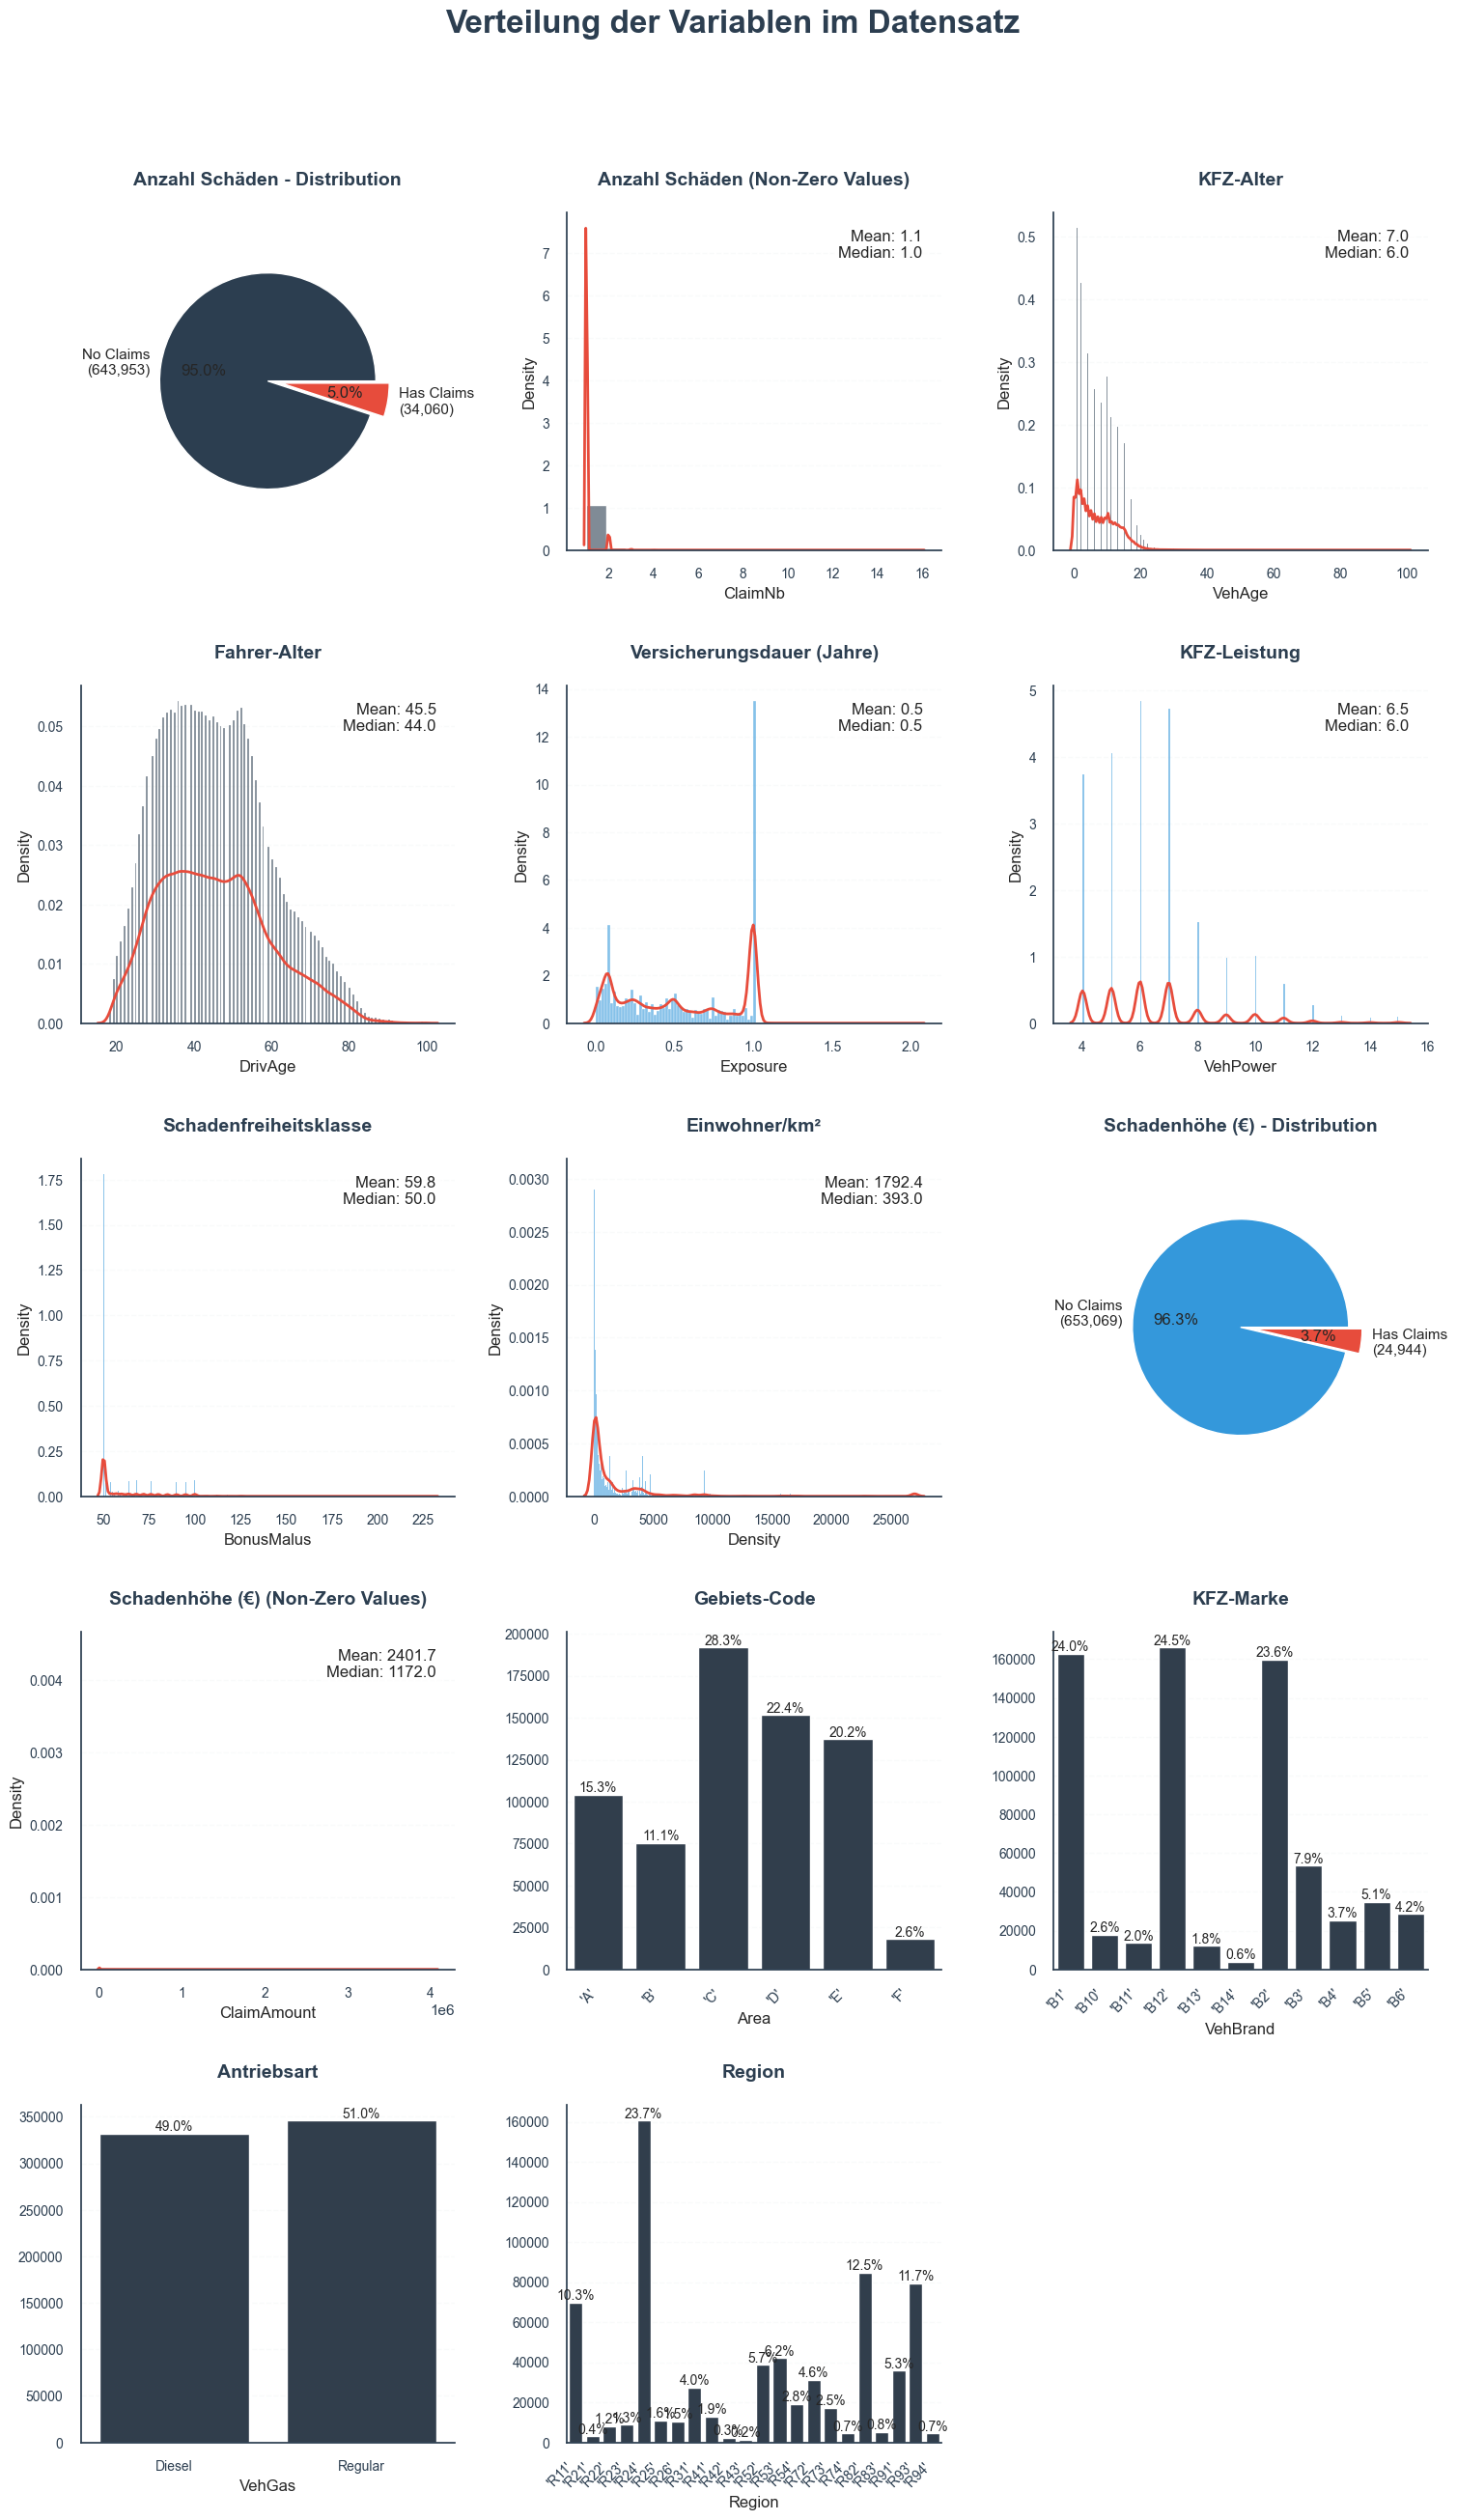

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

class PlotConfig:
    """Configuration for plot styling and colors"""
    COLORS = {
        'primary': '#2C3E50',    # Dark blue-gray
        'secondary': '#E74C3C',  # Coral red
        'accent': '#3498DB',     # Bright blue
        'text': '#2C3E50',       # Dark blue-gray
        'grid': '#ECF0F1'        # Light gray
    }
    SPECIAL_COLS = [FreqColumns.CLAIM_COUNT.value, SevColumns.CLAIM_AMOUNT.value]

def setup_plot_style():
    """Initialize plot style settings"""
    plt.style.use('seaborn-v0_8')
    sns.set_theme(style="white")

def create_figure(total_plots):
    """Create and setup the main figure"""
    rows = (total_plots + 2) // 3
    fig = plt.figure(figsize=(18, 6 * rows))
    gs = GridSpec(rows, 3, figure=fig, hspace=0.4, wspace=0.3)
    
    fig.suptitle('Verteilung der Variablen im Datensatz',
                 fontsize=24,
                 fontweight='bold',
                 color=PlotConfig.COLORS['text'],
                 y=0.95)
    
    return fig, gs

def customize_axis(ax):
    """Apply consistent axis styling"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(PlotConfig.COLORS['text'])
    ax.spines['bottom'].set_color(PlotConfig.COLORS['text'])
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color=PlotConfig.COLORS['grid'])
    ax.tick_params(axis='both', labelsize=10, colors=PlotConfig.COLORS['text'])

def create_pie_chart(data, col, ax, plot_descriptions, use_accent=False):
    """Create a pie chart for zero vs non-zero values"""
    zero_count = (data[col] == 0).sum()
    nonzero_count = (data[col] > 0).sum()
    
    primary_color = PlotConfig.COLORS['accent'] if use_accent else PlotConfig.COLORS['primary']
    
    ax.pie([zero_count, nonzero_count],
           labels=[f'No Claims\n({zero_count:,})', f'Has Claims\n({nonzero_count:,})'],
           colors=[primary_color, PlotConfig.COLORS['secondary']],
           autopct='%1.1f%%',
           explode=(0, 0.1),
           radius=0.8)
    
    ax.set_title(f'{plot_descriptions[col]} - Distribution',
                 pad=20,
                 fontsize=14,
                 color=PlotConfig.COLORS['text'],
                 fontweight='bold')

def create_distribution_plot(data, col, ax, plot_descriptions, stats_only_nonzero=False, use_accent=False):
    """Create a distribution plot with histogram and KDE"""
    plot_data = data[data[col] > 0] if stats_only_nonzero else data
    color = PlotConfig.COLORS['accent'] if use_accent else PlotConfig.COLORS['primary']
    
    # Create histogram with KDE
    sns.histplot(data=plot_data,
                x=col,
                stat='density',
                color=color,
                alpha=0.6,
                ax=ax)
    
    sns.kdeplot(data=plot_data[col],
                color=PlotConfig.COLORS['secondary'],
                linewidth=2,
                ax=ax)
    
    # Add title and stats
    title_suffix = ' (Non-Zero Values)' if stats_only_nonzero else ''
    ax.set_title(f'{plot_descriptions[col]}{title_suffix}',
                 pad=20,
                 fontsize=14,
                 color=PlotConfig.COLORS['text'],
                 fontweight='bold')
    
    stats_text = f'Mean: {plot_data[col].mean():.1f}\nMedian: {plot_data[col].median():.1f}'
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    customize_axis(ax)

def create_categorical_plot(data, col, ax, plot_descriptions):
    """Create a categorical bar plot with percentages"""
    value_counts = data[col].value_counts().sort_index()
    percentages = (value_counts / len(data) * 100).round(1)
    
    bars = sns.barplot(x=value_counts.index,
                      y=value_counts.values,
                      color=PlotConfig.COLORS['primary'],
                      ax=ax)
    
    for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
        ax.text(i, count, f'{percentage}%',
               ha='center',
               va='bottom',
               fontsize=10)
    
    ax.set_title(plot_descriptions[col],
                 pad=20,
                 fontsize=14,
                 color=PlotConfig.COLORS['text'],
                 fontweight='bold')
    
    if len(value_counts) > 5:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    customize_axis(ax)

def plot_variable_distributions(data, integer_columns, numeric_columns, categorical_columns, plot_descriptions):
    """Main function to create all distribution plots"""
    # Setup
    setup_plot_style()
    total_plots = len(integer_columns) + len(numeric_columns) + len(categorical_columns) + len(PlotConfig.SPECIAL_COLS)
    fig, gs = create_figure(total_plots)
    plot_idx = 0
    
    # Plot integer variables
    for col in integer_columns:
        if col in PlotConfig.SPECIAL_COLS:
            # Create pie chart
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_pie_chart(data, col, ax, plot_descriptions)
            plot_idx += 1
            
            # Create distribution plot for non-zero values
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_distribution_plot(data, col, ax, plot_descriptions, stats_only_nonzero=True)
            plot_idx += 1
        else:
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_distribution_plot(data, col, ax, plot_descriptions)
            plot_idx += 1
    
    # Plot numeric variables
    for col in numeric_columns:
        if col in PlotConfig.SPECIAL_COLS:
            # Create pie chart
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_pie_chart(data, col, ax, plot_descriptions, use_accent=True)
            plot_idx += 1
            
            # Create distribution plot for non-zero values
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_distribution_plot(data, col, ax, plot_descriptions, stats_only_nonzero=True, use_accent=True)
            plot_idx += 1
        else:
            ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
            create_distribution_plot(data, col, ax, plot_descriptions, use_accent=True)
            plot_idx += 1
    
    # Plot categorical variables
    for col in categorical_columns:
        ax = fig.add_subplot(gs[plot_idx // 3, plot_idx % 3])
        create_categorical_plot(data, col, ax, plot_descriptions)
        plot_idx += 1
    
    return fig

# Example usage remains the same:
fig = plot_variable_distributions(
    data=df_combined,
    integer_columns=INTEGER_COLUMNS,
    numeric_columns=NUMERIC_COLUMNS,
    categorical_columns=CATEGORICAL_COLUMNS,
    plot_descriptions=PLOT_DESCRIPTIONS
)
plt.show()

Bemerkungen:
- Nur 5.0% der 

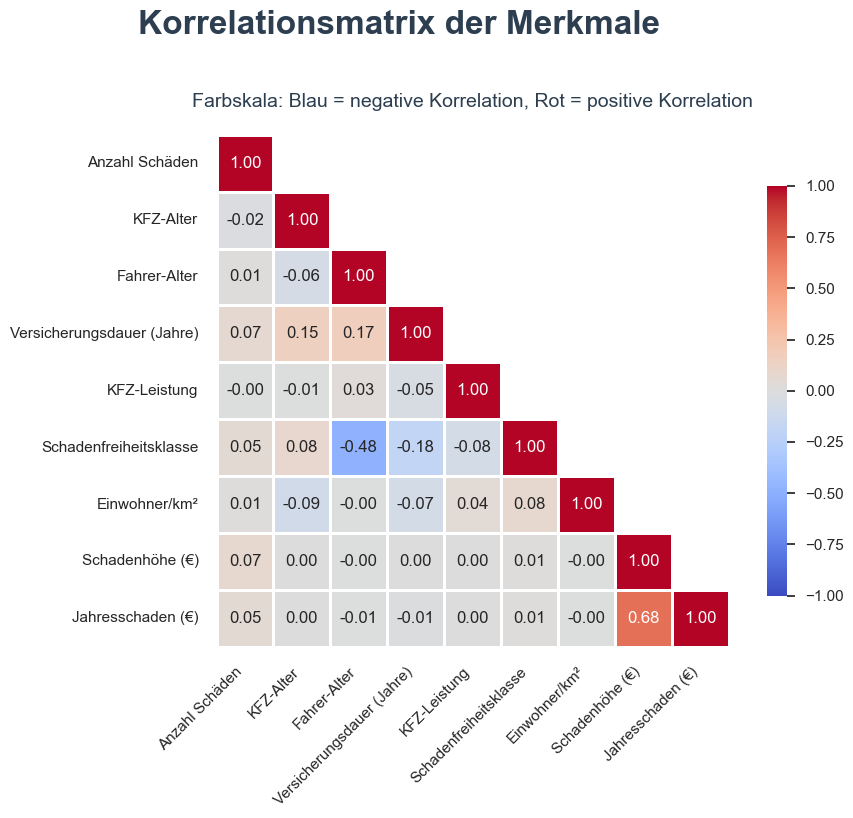

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_correlation_matrix(data, feature_columns, target_column, plot_descriptions):
    colors = {
        'background': '#FFFFFF',
        'text': '#2C3E50',
        'grid': '#ECF0F1',
        'highlight': '#E74C3C'
    }
    
    # Set style
    plt.style.use('seaborn-v0_8')
    sns.set_theme(style="white")
    
    # Calculate correlation matrix
    columns = feature_columns + [target_column]
    correlation_matrix = data[columns].corr()
    
    # Create figure with gridspec for better control
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(1, 1, figure=fig)
    ax = fig.add_subplot(gs[0, 0])
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix), k=1)
    
    # Create heatmap with enhanced styling
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": .8},
                ax=ax)
    
    # Customize labels using descriptions
    labels = [plot_descriptions.get(col, col) for col in columns]
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticklabels(labels, rotation=0)
    
    # Add title and styling
    plt.suptitle(
        'Korrelationsmatrix der Merkmale', 
        fontsize=24,
        fontweight='bold',
        color=colors['text'],
        y=1.02
    )
    
    # Add subtitle with interpretation guide
    plt.title(
        'Farbskala: Blau = negative Korrelation, Rot = positive Korrelation',
        fontsize=14,
        color=colors['text'],
        pad=20
    )
    
    # Adjust layout
    plt.tight_layout()
    return fig

fig = plot_correlation_matrix(
    data=df_combined,
    feature_columns=INTEGER_COLUMNS + NUMERIC_COLUMNS,  # Combine numeric features
    target_column=DerivedColumns.YEARLY_CLAIM_AMOUNT.value,
    plot_descriptions=PLOT_DESCRIPTIONS
)
plt.show()

Bemerkungen:
- Jahresschaden korreliert positive mit der Schadenhöhe --> es ist erwartet und erklärt davon, wie wir die Schadenhöhe berechnen
- Schadenfreiheitsklasse korreliert negativ mit dem Alter des Fahrers --> es ist auch erwartet und erklärt davon, dass die Freiheitsklasse mit dem Alter niedriger wird

# 9. Feature Engineering

## 9.1 Bonus Malus

In [33]:
print(f"Minimum of bonus malus: {df_combined[FreqColumns.BONUS_MALUS.value].min()}")
print(f"Maximum of bonus malus: {df_combined[FreqColumns.BONUS_MALUS.value].max()}")

Minimum of bonus malus: 50.0
Maximum of bonus malus: 230.0


In [34]:
# Binäre Kategorisierung
df_combined['is_standard_bonus'] = df_combined[FreqColumns.BONUS_MALUS.value].between(45, 55)  # True/False

# 2. Normalisierte Werte auch für die Ausreißer
def normalize_bonus_malus(bonus_malus_value):
    return np.round((bonus_malus_value - 50) / (200 - 50), 2)

df_combined['bonus_malus_risk_score'] = df_combined[FreqColumns.BONUS_MALUS.value].apply(normalize_bonus_malus)

In [35]:
df_combined.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'yearly_claim_amount', 'is_standard_bonus', 'bonus_malus_risk_score'],
      dtype='object')

In [36]:
df_combined[[FreqColumns.BONUS_MALUS.value, 'is_standard_bonus', 'bonus_malus_risk_score']].head(n=20)

,BonusMalus,is_standard_bonus,bonus_malus_risk_score
0,50.0,True,0.00
1,50.0,True,0.00
2,50.0,True,0.00
3,50.0,True,0.00
4,50.0,True,0.00
5,50.0,True,0.00
6,50.0,True,0.00
7,68.0,False,0.12
8,68.0,False,0.12
9,50.0,True,0.00


## 9.2 Bonus Malus - Categories

Using categories instead of raw numbers in order to account for nonlinearity and the high frequency of people with a value 0.

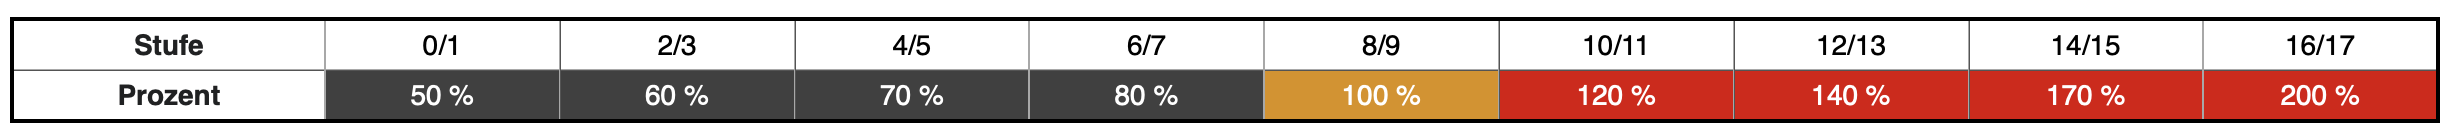

In [37]:
df_combined = df_combined.drop(['is_standard_bonus', 'bonus_malus_risk_score'], axis=1)
df_combined.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'yearly_claim_amount'],
      dtype='object')

In [38]:
# Kategorisierung der Bonus-Malus-Werte
conditions = [
    df_combined[FreqColumns.BONUS_MALUS.value] <= 50,
    df_combined[FreqColumns.BONUS_MALUS.value].between(50, 60),
    df_combined[FreqColumns.BONUS_MALUS.value].between(60, 70),
    df_combined[FreqColumns.BONUS_MALUS.value].between(70, 80),
    df_combined[FreqColumns.BONUS_MALUS.value].between(80, 100),
    df_combined[FreqColumns.BONUS_MALUS.value].between(100, 120),
    df_combined[FreqColumns.BONUS_MALUS.value].between(120, 140),
    df_combined[FreqColumns.BONUS_MALUS.value].between(140, 170),
    df_combined[FreqColumns.BONUS_MALUS.value] > 170
]

choices = [
    'BM_Stufe_0_1_bestRisk',     # 50%
    'BM_Stufe_2_3_lowRisk',      # 60%
    'BM_Stufe_4_5_lowMedRisk',   # 70%
    'BM_Stufe_6_7_medRisk',      # 80%
    'BM_Stufe_8_9_standard',     # 100%
    'BM_Stufe_10_11_highRisk',   # 120%
    'BM_Stufe_12_13_veryHigh',   # 140%
    'BM_Stufe_14_15_severe',     # 170%
    'BM_Stufe_16_17_maxRisk'     # 200%
]

df_combined['bonus_malus_category'] = np.select(conditions, choices, default='Undefined')

In [39]:
df_combined['bonus_malus_category'].value_counts()

bonus_malus_category
BM_Stufe_0_1_bestRisk      384156
BM_Stufe_2_3_lowRisk        94446
BM_Stufe_8_9_standard       72862
BM_Stufe_6_7_medRisk        61826
BM_Stufe_4_5_lowMedRisk     56929
BM_Stufe_10_11_highRisk      5554
BM_Stufe_12_13_veryHigh      1832
BM_Stufe_14_15_severe         359
BM_Stufe_16_17_maxRisk         49
Name: count, dtype: int64

## 9.3 Vehicle Features

In [40]:
print(f"Describe Vehicle Power:\n{df_combined[FreqColumns.VEHICLE_POWER.value].describe()}")

Describe Vehicle Power:
count    678013.000000
mean          6.454631
std           2.050906
min           4.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          15.000000
Name: VehPower, dtype: float64


In [41]:
df_combined[FreqColumns.VEHICLE_POWER.value].value_counts()

VehPower
6.0     148976
7.0     145401
5.0     124821
4.0     115349
8.0      46956
10.0     31354
9.0      30085
11.0     18352
12.0      8214
13.0      3229
15.0      2926
14.0      2350
Name: count, dtype: int64

In [42]:
print(f"Describe Vehicle Age:\n{df_combined[FreqColumns.VEHICLE_AGE.value].describe()}")

Describe Vehicle Age:
count    678013.000000
mean          7.044265
std           5.666232
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max         100.000000
Name: VehAge, dtype: float64


- Vehicle Age kann auch 100 sein -> nicht linear, lieber Kategorien
- Vehicle Power: lieber kategorien.

In [43]:
# Power-to-Age Ratio: Junges Auto + hohe Leistung möglicherweise riskant
df_combined['power_age_ratio'] = df_combined[FreqColumns.VEHICLE_POWER.value] / (df_combined[FreqColumns.VEHICLE_AGE.value] + 1)  # /0 Vermeiden

# Fahrzeugaltersgruppen: neu/mittel/alt
df_combined['vehicle_age_group'] = pd.cut(
    df_combined[FreqColumns.VEHICLE_AGE.value],
    bins=[-1, 3, 8, 15, float('inf')],
    labels=['Neu (0-3)', 'Mittel (4-8)', 'Alt (9-15)', 'Sehr Alt (>15)']
)

In [44]:
# convert vehicle power to categorical
df_combined[FreqColumns.VEHICLE_POWER.value] = df_combined[FreqColumns.VEHICLE_POWER.value].astype('category')

In [45]:
df_combined[[FreqColumns.VEHICLE_POWER.value, FreqColumns.VEHICLE_AGE.value, 'power_age_ratio', 'vehicle_age_group']].head(n=40)

,VehPower,VehAge,power_age_ratio,vehicle_age_group
0,5.0,0,5.000000,Neu (0-3)
1,5.0,0,5.000000,Neu (0-3)
2,6.0,2,2.000000,Neu (0-3)
3,7.0,0,7.000000,Neu (0-3)
4,7.0,0,7.000000,Neu (0-3)
5,6.0,2,2.000000,Neu (0-3)
6,6.0,2,2.000000,Neu (0-3)
7,7.0,0,7.000000,Neu (0-3)
8,7.0,0,7.000000,Neu (0-3)
9,7.0,0,7.000000,Neu (0-3)


In [46]:
df_combined['power_age_ratio'].describe()

count    678013.000000
mean          1.662317
std           1.949260
min           0.039604
25%           0.500000
50%           0.875000
75%           2.000000
max          15.000000
Name: power_age_ratio, dtype: float64

In [47]:
df_combined['vehicle_age_group'].value_counts()

vehicle_age_group
Neu (0-3)         238408
Alt (9-15)        204380
Mittel (4-8)      183506
Sehr Alt (>15)     51719
Name: count, dtype: int64

## 9.4 Driver Features

In [48]:
print(f"Drive Age stats: {df_combined[FreqColumns.DRIVER_AGE.value].describe()}")

Drive Age stats: count    678013.000000
mean         45.499122
std          14.137444
min          18.000000
25%          34.000000
50%          44.000000
75%          55.000000
max         100.000000
Name: DrivAge, dtype: float64


In [50]:
# Fahrerfahrung: 18 als Mindestalter in Frankreich
df_combined['driving_experience'] = df_combined[FreqColumns.DRIVER_AGE.value] - 18
# df_combined['driving_experience'] = df_combined['driving_experience'].clip(lower=0)  # Keine negativen Werte

# Fahrer-Power-Ratio: Junge Fahrer + starke Autos möglicherweise riskant
df_combined[FreqColumns.VEHICLE_POWER.value] = df_combined[FreqColumns.VEHICLE_POWER.value].astype(float)
df_combined['driver_power_ratio'] = df_combined[FreqColumns.VEHICLE_POWER.value] / df_combined[FreqColumns.DRIVER_AGE.value]

# Fahrer Altersgruppen
df_combined['driver_age_group'] = pd.cut(
    df_combined[FreqColumns.DRIVER_AGE.value],
    bins=[0, 25, 35, 45, 55, 65, float('inf')],
    labels=['Jung', 'Jung Erwachsen', 'Erwachsen', 'Mittel', 'Senior', 'Senior Plus']
)

In [51]:
df_combined.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'yearly_claim_amount', 'bonus_malus_category', 'power_age_ratio',
       'vehicle_age_group', 'driving_experience', 'driver_power_ratio',
       'driver_age_group'],
      dtype='object')

In [52]:
df_combined[[FreqColumns.VEHICLE_POWER.value, FreqColumns.DRIVER_AGE.value, 'driving_experience', 'driver_power_ratio', 'driver_age_group']].head(n=20)

,VehPower,DrivAge,driving_experience,driver_power_ratio,driver_age_group
0,5.0,55,37,0.090909,Mittel
1,5.0,55,37,0.090909,Mittel
2,6.0,52,34,0.115385,Mittel
3,7.0,46,28,0.152174,Mittel
4,7.0,46,28,0.152174,Mittel
5,6.0,38,20,0.157895,Erwachsen
6,6.0,38,20,0.157895,Erwachsen
7,7.0,33,15,0.212121,Jung Erwachsen
8,7.0,33,15,0.212121,Jung Erwachsen
9,7.0,41,23,0.170732,Erwachsen


## 9.5 Regional factors

In [53]:
# Urbanisierungsgrad aus Density
quantiles = df_combined[FreqColumns.DENSITY.value].quantile([0, 0.333, 0.667, 1])

print(f"0% quantile: {quantiles[0]}")
print(f"33% quantile: {quantiles[0.333]}")
print(f"66% quantile: {quantiles[0.667]}")
print(f"100% quantile: {quantiles[1]}")

0% quantile: 1.0
33% quantile: 149.0
66% quantile: 1064.0
100% quantile: 27000.0


In [54]:
df_combined['urbanization_level'] = pd.qcut(
    df_combined[FreqColumns.DENSITY.value],
    q=3,
    labels=['Ländlich', 'Suburban', 'Urban']
)

In [55]:
df_combined.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount',
       'yearly_claim_amount', 'bonus_malus_category', 'power_age_ratio',
       'vehicle_age_group', 'driving_experience', 'driver_power_ratio',
       'driver_age_group', 'urbanization_level'],
      dtype='object')

In [56]:
df_combined[[FreqColumns.REGION.value, FreqColumns.DENSITY.value, 'urbanization_level']].head(n=20)

,Region,Density,urbanization_level
0,'R82',1217.0,Urban
1,'R82',1217.0,Urban
2,'R22',54.0,Ländlich
3,'R72',76.0,Ländlich
4,'R72',76.0,Ländlich
5,'R31',3003.0,Urban
6,'R31',3003.0,Urban
7,'R91',137.0,Ländlich
8,'R91',137.0,Ländlich
9,'R52',60.0,Ländlich


In [57]:
df_combined['urbanization_level'].value_counts()

urbanization_level
Ländlich    227372
Suburban    225327
Urban       225314
Name: count, dtype: int64

Andere Ideen:
- Regional Density Estimation (welches Perzent#il in der Region?)
- Generell: Risk-Scores, die mehrere Merkmale kombinieren

## 9.6 Exposure - Kategorien

In [58]:
df_combined[FreqColumns.EXPOSURE.value].describe()

count    678013.000000
mean          0.528750
std           0.364442
min           0.002732
25%           0.180000
50%           0.490000
75%           0.990000
max           2.010000
Name: Exposure, dtype: float64

We shouldn't do anything - the values are already quite linear so normalisation is enough.

# 10. Feature Encoding

In [59]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   IDpol                 678013 non-null  int64   
 1   ClaimNb               678013 non-null  int64   
 2   Exposure              678013 non-null  float64 
 3   Area                  678013 non-null  category
 4   VehPower              678013 non-null  float64 
 5   VehAge                678013 non-null  int64   
 6   DrivAge               678013 non-null  int64   
 7   BonusMalus            678013 non-null  float64 
 8   VehBrand              678013 non-null  category
 9   VehGas                678013 non-null  category
 10  Density               678013 non-null  float64 
 11  Region                678013 non-null  category
 12  ClaimAmount           678013 non-null  float64 
 13  yearly_claim_amount   678013 non-null  float64 
 14  bonus_malus_category  678013 non-nul

In [60]:
from enum import Enum

class Columns(Enum):
  """
  Zentrale Definition aller Spalten im kombinierten Datensatz.
  Gruppiert nach ihrer Rolle im Modell und Datentyp.
  """
  # IDs
  ID = 'IDpol'

  # Original numerische Features
  EXPOSURE = 'Exposure'
  VEHICLE_AGE = 'VehAge' 
  DRIVER_AGE = 'DrivAge'
  BONUS_MALUS = 'BonusMalus'
  DENSITY = 'Density'
  
  # Original kategorische Features
  AREA = 'Area'
  VEHICLE_POWER = 'VehPower'
  VEHICLE_BRAND = 'VehBrand'
  VEHICLE_GAS = 'VehGas'
  REGION = 'Region'
  
  # Engineered numerische Features
  POWER_AGE_RATIO = 'power_age_ratio'
  DRIVING_EXPERIENCE = 'driving_experience'
  DRIVER_POWER_RATIO = 'driver_power_ratio'
  
  # Engineered kategorische Features
  VEHICLE_AGE_GROUP = 'vehicle_age_group'
  DRIVER_AGE_GROUP = 'driver_age_group'
  URBANIZATION_LEVEL = 'urbanization_level'
  BONUS_MALUS_CATEGORY = 'bonus_malus_category'
  EXPOSURE_LENGTH = 'exposure_length'
  
  # Target-relevante Spalten
  CLAIM_COUNT = 'ClaimNb'
  CLAIM_AMOUNT = 'ClaimAmount'
  YEARLY_CLAIM_AMOUNT = 'yearly_claim_amount'
  CLAIM_RATE = 'claim_rate'

# Gruppierung nach Verwendungszweck
ID_COLUMNS = [
  Columns.ID.value
]

NUMERICAL_FEATURES = [
  Columns.EXPOSURE.value,
  Columns.VEHICLE_AGE.value,
  Columns.DRIVER_AGE.value,
  Columns.BONUS_MALUS.value,
  Columns.DENSITY.value,
  Columns.POWER_AGE_RATIO.value,
  Columns.DRIVING_EXPERIENCE.value,
  Columns.DRIVER_POWER_RATIO.value,
  Columns.EXPOSURE_LENGTH.value,
]

CATEGORICAL_FEATURES = [
  Columns.VEHICLE_GAS.value,
  Columns.VEHICLE_AGE_GROUP.value,
  Columns.DRIVER_AGE_GROUP.value,
  Columns.URBANIZATION_LEVEL.value,
  Columns.BONUS_MALUS_CATEGORY.value,
  Columns.AREA.value,
  Columns.VEHICLE_POWER.value,
  Columns.VEHICLE_BRAND.value,
  Columns.REGION.value
]

TARGET_COLUMNS = [
  Columns.CLAIM_COUNT.value,
  Columns.CLAIM_AMOUNT.value,
  Columns.YEARLY_CLAIM_AMOUNT.value
]

# Alle Features zusammen (ohne Target und ID)
ALL_FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES

In [61]:
for feat in CATEGORICAL_FEATURES:
    print(f"Number of unique values for {feat}: {df_combined[feat].nunique()}")

Number of unique values for VehGas: 2
Number of unique values for vehicle_age_group: 4
Number of unique values for driver_age_group: 6
Number of unique values for urbanization_level: 3
Number of unique values for bonus_malus_category: 9
Number of unique values for Area: 6
Number of unique values for VehPower: 12
Number of unique values for VehBrand: 11
Number of unique values for Region: 22


Anmerkungen:
- VehPower is ordinal -> wir benutzen Ordinal Encoding
- One-hot Encoding nur maximal bis ~10 Kategorien sinnvoll. Für Simplifikation wir nehmen VehPower auch mit OneHot rein.
- Für Region, der einzige Feature übrig, benutzen wir Target Encoding

In [62]:
CATEGORICAL_FEATURES_ONEHOT = [
  Columns.VEHICLE_GAS.value,
  Columns.VEHICLE_AGE_GROUP.value,
  Columns.DRIVER_AGE_GROUP.value,
  Columns.URBANIZATION_LEVEL.value,
  Columns.BONUS_MALUS_CATEGORY.value,
  Columns.AREA.value,
  Columns.VEHICLE_BRAND.value,
]

CATEGORICAL_FEATURES_ORDINAL = [
  Columns.VEHICLE_POWER.value,
]

CATEGORICAL_FEATURES_CATEGORICAL = [
  Columns.REGION.value
]

## 10.1 OneHot Encoding

In [63]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def apply_onehot_encoding(df, columns_to_encode):
    result_df = df.copy()
    
    for column in columns_to_encode:
        print(f"Encoding column: {column}")

        enc = OneHotEncoder(sparse_output=False, drop='first')
        encoded = enc.fit_transform(df[[column]])
        
        # Get category names (excluding the first one that was dropped)
        categories = enc.categories_[0][1:]
        column_names = [f"{column}_{cat}" for cat in categories]
        
        # Add encoded columns to result
        for i, name in enumerate(column_names):
            result_df[name] = encoded[:, i]
    
    # Drop original columns
    result_df = result_df.drop(columns=columns_to_encode)
    
    return result_df

df_onehot = apply_onehot_encoding(
    df_combined, 
    CATEGORICAL_FEATURES_ONEHOT
)

Encoding column: VehGas
Encoding column: vehicle_age_group
Encoding column: driver_age_group
Encoding column: urbanization_level
Encoding column: bonus_malus_category
Encoding column: Area
Encoding column: VehBrand


In [64]:
print("\nShape before encoding:", df_combined.shape)
print("Shape after encoding:", df_onehot.shape)

df_onehot.columns


Shape before encoding: (678013, 21)
Shape after encoding: (678013, 48)


Index(['IDpol', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'Density', 'Region', 'ClaimAmount', 'yearly_claim_amount',
       'power_age_ratio', 'driving_experience', 'driver_power_ratio',
       'VehGas_Regular', 'vehicle_age_group_Mittel (4-8)',
       'vehicle_age_group_Neu (0-3)', 'vehicle_age_group_Sehr Alt (>15)',
       'driver_age_group_Jung', 'driver_age_group_Jung Erwachsen',
       'driver_age_group_Mittel', 'driver_age_group_Senior',
       'driver_age_group_Senior Plus', 'urbanization_level_Suburban',
       'urbanization_level_Urban',
       'bonus_malus_category_BM_Stufe_10_11_highRisk',
       'bonus_malus_category_BM_Stufe_12_13_veryHigh',
       'bonus_malus_category_BM_Stufe_14_15_severe',
       'bonus_malus_category_BM_Stufe_16_17_maxRisk',
       'bonus_malus_category_BM_Stufe_2_3_lowRisk',
       'bonus_malus_category_BM_Stufe_4_5_lowMedRisk',
       'bonus_malus_category_BM_Stufe_6_7_medRisk',
       'bonus_malus_category_BM_Stuf

## 10.2 Ordinal Encoding

In [65]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def apply_ordinal_encoding(df, columns_to_encode):
    result_df = df.copy()
    
    for column in columns_to_encode:
        print(f"Encoding column: {column}")
    
        enc = OrdinalEncoder()
        encoded = enc.fit_transform(df[[column]])
        
        # Add encoded column with a suffix
        result_df[f"{column}_ord"] = encoded
        
        # Print mapping for reference
        categories = enc.categories_[0]
        mapping = {cat: idx for idx, cat in enumerate(categories)}
        print(f"Mapping for {column}:", mapping)
    
    # Drop original columns
    result_df = result_df.drop(columns=columns_to_encode)
    
    return result_df

# Let's try it!
df_ordinal_onehot = apply_ordinal_encoding(
    df_onehot, 
    CATEGORICAL_FEATURES_ORDINAL
)

Encoding column: VehPower
Mapping for VehPower: {np.float64(4.0): 0, np.float64(5.0): 1, np.float64(6.0): 2, np.float64(7.0): 3, np.float64(8.0): 4, np.float64(9.0): 5, np.float64(10.0): 6, np.float64(11.0): 7, np.float64(12.0): 8, np.float64(13.0): 9, np.float64(14.0): 10, np.float64(15.0): 11}


In [66]:
print("\nShape before encoding:", df_onehot.shape)
print("Shape after encoding:", df_ordinal_onehot.shape)
print("\nNew columns:", [col for col in df_ordinal_onehot.columns if '_ord' in col])


Shape before encoding: (678013, 48)
Shape after encoding: (678013, 48)

New columns: ['VehPower_ord']


## 10.3 Target Encoding

In [67]:
df_combined[CATEGORICAL_FEATURES_CATEGORICAL].nunique()

Region    22
dtype: int64

In [68]:
def apply_simple_target_encoding(df, columns_to_encode, target_column, smoothing_factor=100):
    result_df = df.copy()
    
    # Global mean for smoothing
    global_mean = df[target_column].mean()
    for col in columns_to_encode:
        result_df[col] = result_df[col].astype(str)
    
    for column in columns_to_encode:
        print(f"Encoding column: {column}")
        
        # Calculate counts and means for each category
        category_stats = df.groupby(column).agg({
            target_column: ['count', 'mean']
        })[target_column]
        
        # Apply smoothing
        count = category_stats['count']
        mean = category_stats['mean']
        smoothed_means = (
            count * mean + 
            smoothing_factor * global_mean
        ) / (count + smoothing_factor)
        
        # Create encoded column
        result_df[f"{column}_target"] = df[column].map(smoothed_means)
        
        # Fill missing values with global mean
        # result_df[f"{column}_target"].fillna(global_mean, inplace=True)
        
        # Print some stats
        print(f"Number of categories: {len(smoothed_means)}")
        # print(f"Mean encoded value: {result_df[f'{column}_target'].mean():.2f}")
    
    # Drop original columns
    result_df = result_df.drop(columns=columns_to_encode)
    
    return result_df

df_target_ordinal_onehot = apply_simple_target_encoding(
    df_ordinal_onehot, 
    CATEGORICAL_FEATURES_CATEGORICAL,
    Columns.YEARLY_CLAIM_AMOUNT.value
)

Encoding column: Region
Number of categories: 22


In [69]:
print(df_combined[[Columns.REGION.value, Columns.YEARLY_CLAIM_AMOUNT.value]].groupby(Columns.REGION.value).mean())
print(f"Unique regions: {df_combined[Columns.REGION.value].nunique()}")

        yearly_claim_amount
Region                     
'R11'            511.182223
'R21'           1473.573107
'R22'            580.439108
'R23'            113.502544
'R24'            449.846900
'R25'            334.438172
'R26'            172.691345
'R31'            397.559380
'R41'            279.921359
'R42'            150.675995
'R43'            189.009200
'R52'            371.721186
'R53'            307.385201
'R54'            231.015403
'R72'            217.317124
'R73'            100.832140
'R74'            165.349171
'R82'            561.372565
'R83'            192.413798
'R91'            231.852985
'R93'            279.833558
'R94'            261.753269
Unique regions: 22


In [70]:
print(df_target_ordinal_onehot[['Region_target']].value_counts())
print(f"Unique values for Region_target: {df_target_ordinal_onehot['Region_target'].nunique()}")

Region_target
449.805465       160601
561.162656        84752
279.963794        79315
510.999193        69791
307.564907        42122
371.750888        38751
232.274675        35805
217.845119        31329
397.507166        27285
231.810584        19046
102.470262        17141
280.710812        12990
334.882297        10893
174.679350        10492
116.538994         8784
578.003003         7994
195.956530         5287
170.018372         4567
264.385581         4516
1438.694273        3026
160.788377         2200
202.631329         1326
Name: count, dtype: int64
Unique values for Region_target: 22


In [71]:
print("\nShape before encoding:", df_target_ordinal_onehot.shape)
print("Shape after encoding:", df_target_ordinal_onehot.shape)
print("\nNew columns:", [col for col in df_target_ordinal_onehot.columns if '_target' in col])


Shape before encoding: (678013, 48)
Shape after encoding: (678013, 48)

New columns: ['Region_target']


## 10.4 Dropping Redundant Variables

Since we defined urbanization levels from densities, we would like to drop the density column from the dataset.
Reasons for using urbanization instead of density: interpretability, simplicity, nonlinearity.

Variables to drop:
- Density
- DrivAge
- VehAge
- BonusMalus

In [72]:
redundant_features = [
  Columns.DENSITY.value,
  Columns.DRIVER_AGE.value,
  Columns.VEHICLE_AGE.value,
  Columns.BONUS_MALUS.value
]

# Create copy and drop redundant features
df_cleaned = df_target_ordinal_onehot.copy()
df_cleaned = df_cleaned.drop(columns=redundant_features)

# Print shape before and after
print(f"Shape before dropping redundant features: {df_target_ordinal_onehot.shape}")
print(f"Shape after dropping redundant features: {df_cleaned.shape}")

Shape before dropping redundant features: (678013, 48)
Shape after dropping redundant features: (678013, 44)


# 11. Feature Scaling

In [73]:
df_cleaned.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'ClaimAmount', 'yearly_claim_amount',
       'power_age_ratio', 'driving_experience', 'driver_power_ratio',
       'VehGas_Regular', 'vehicle_age_group_Mittel (4-8)',
       'vehicle_age_group_Neu (0-3)', 'vehicle_age_group_Sehr Alt (>15)',
       'driver_age_group_Jung', 'driver_age_group_Jung Erwachsen',
       'driver_age_group_Mittel', 'driver_age_group_Senior',
       'driver_age_group_Senior Plus', 'urbanization_level_Suburban',
       'urbanization_level_Urban',
       'bonus_malus_category_BM_Stufe_10_11_highRisk',
       'bonus_malus_category_BM_Stufe_12_13_veryHigh',
       'bonus_malus_category_BM_Stufe_14_15_severe',
       'bonus_malus_category_BM_Stufe_16_17_maxRisk',
       'bonus_malus_category_BM_Stufe_2_3_lowRisk',
       'bonus_malus_category_BM_Stufe_4_5_lowMedRisk',
       'bonus_malus_category_BM_Stufe_6_7_medRisk',
       'bonus_malus_category_BM_Stufe_8_9_standard', 'Area_'B'', 'Area_'C'',
       'Area_'D'', 'Area_'E'', 'Ar

The columns Exposure, Power age ratio, Driving Experience, Driver power ratio need to be scaled. Otherwise all other columns are either dummy, target, encoded, or id columns.

In [74]:
FEATURES_TO_SCALE = [
    Columns.EXPOSURE.value,
    Columns.POWER_AGE_RATIO.value,
    Columns.DRIVING_EXPERIENCE.value,
    Columns.DRIVER_POWER_RATIO.value,
]

df_cleaned[FEATURES_TO_SCALE].describe()

,Exposure,power_age_ratio,driving_experience,driver_power_ratio
count,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.528750,1.662317,27.499122,0.156002
std,0.364442,1.949260,14.137444,0.069304
min,0.002732,0.039604,0.000000,0.040404
25%,0.180000,0.500000,16.000000,0.105263
50%,0.490000,0.875000,26.000000,0.142857
75%,0.990000,2.000000,37.000000,0.192308
max,2.010000,15.000000,82.000000,0.833333


In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(df):
    df_scaled = df.copy()
    
    # Initialize our scalers
    standard_scaler = StandardScaler()
    
    # Features for standard scaling (making mean=0, std=1)
    standard_scale_features = [
        'Exposure',           # Normal distribution
        'driving_experience', # Age-related, normal
    ]
    
    # Features for min-max scaling (to [0,1] range)
    minmax_scale_features = [
        'power_age_ratio',    # Bounded ratio
        'driver_power_ratio', # Bounded ratio
    ]
    
    # Apply standard scaling
    df_scaled[standard_scale_features] = standard_scaler.fit_transform(
        df_scaled[standard_scale_features]
    )
    
    # Apply min-max scaling
    minmax_scaler = MinMaxScaler()
    df_scaled[minmax_scale_features] = minmax_scaler.fit_transform(
        df_scaled[minmax_scale_features]
    )
    
    return df_scaled

df_scaled = scale_features(df_cleaned)

In [76]:
for feature in FEATURES_TO_SCALE:
    print(f"\n{feature}:")
    print(df_scaled[feature].describe())


Exposure:
count    6.780130e+05
mean    -3.299873e-16
std      1.000001e+00
min     -1.443354e+00
25%     -9.569446e-01
50%     -1.063274e-01
75%      1.265636e+00
max      4.064441e+00
Name: Exposure, dtype: float64

power_age_ratio:
count    678013.000000
mean          0.108467
std           0.130295
min           0.000000
25%           0.030774
50%           0.055841
75%           0.131039
max           1.000000
Name: power_age_ratio, dtype: float64

driving_experience:
count    6.780130e+05
mean    -1.129720e-17
std      1.000001e+00
min     -1.945128e+00
25%     -8.133811e-01
50%     -1.060392e-01
75%      6.720370e-01
max      3.855076e+00
Name: driving_experience, dtype: float64

driver_power_ratio:
count    678013.000000
mean          0.145785
std           0.087402
min           0.000000
25%           0.081797
50%           0.129208
75%           0.191573
max           1.000000
Name: driver_power_ratio, dtype: float64


In [77]:
df_scaled[FEATURES_TO_SCALE].head(n=10)

,Exposure,power_age_ratio,driving_experience,driver_power_ratio
0,-1.176459,0.331568,0.672037,0.063694
1,0.661972,0.331568,0.672037,0.063694
2,0.607093,0.131039,0.459834,0.094561
3,-1.203898,0.465255,0.035429,0.140958
4,0.854047,0.465255,0.035429,0.140958
5,-0.024010,0.131039,-0.530444,0.148173
6,-0.216084,0.131039,-0.530444,0.148173
7,-0.709991,0.465255,-0.884115,0.216561
8,0.497336,0.465255,-0.884115,0.216561
9,-1.039262,0.465255,-0.318242,0.164362


# 12. Model Training

Two-Stage model training approach.

Data Preparation
- Feature Scaling (standard & minmax scaling)
- Keep encoded categorical features
- Remove unnecessary columns (IDs, raw targets)

Stage 1: Claim Occurrence Model
- Goal: Predict if a policy will have a claim (yes/no) -> binary
- Uses full dataset
- Target: ClaimNb > 0

Stage 2: Claim Severity Model
- Goal: Predict claim amount (if claim occurs) -> regression
- Uses only policies with claims
- Target: yearly_claim_amount

Steps
- Split the whole dataset (80/20), with stratification on
  - Claim number = 0 vs > 0
  - Claim Amount = 0 vs > 0
- Train occurrence model on full training set
- Train severity model on claims-only subset
- Final prediction = P(claim) × Expected severity

## 12.1 Feature Selection

In [78]:
columns_to_exclude = [
    Columns.ID.value,                # Identifier
    Columns.CLAIM_COUNT.value,       # Used for target creation
    Columns.CLAIM_AMOUNT.value,      # Used for target creation
    Columns.YEARLY_CLAIM_AMOUNT.value,   # Final target
    Columns.CLAIM_RATE.value         # Derived target
]

# Get our features
feature_columns = [col for col in df_scaled.columns if col not in columns_to_exclude]
X = df_scaled[feature_columns]

## 12.2 Create Target Variables

In [79]:
def create_targets(df: pd.DataFrame) -> tuple:
  y_occurrence = (df['ClaimNb'] > 0).astype(int)

  # Continuous target for severity model
  y_severity = df['yearly_claim_amount']

  return y_occurrence, y_severity

y_occurrence, y_severity = create_targets(df_scaled)

## 12.3 Data Splitting

In [80]:
from sklearn.model_selection import train_test_split

def stratified_insurance_data_split(
    X: pd.DataFrame, 
    y_occurrence: pd.Series,
    y_severity: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42) -> tuple:
    strat_groups = (
        (y_occurrence > 0).astype(str) + '_' + 
        (y_severity > 0).astype(str)
    )

    # Perform stratified split
    X_train, X_test, y_occ_train, y_occ_test, y_sev_train, y_sev_test = train_test_split(
        X, 
        y_occurrence,
        y_severity,
        test_size=test_size,
        random_state=random_state,
        stratify=strat_groups
    )

    return X_train, X_test, y_occ_train, y_occ_test, y_sev_train, y_sev_test

splits = stratified_insurance_data_split(X, y_occurrence, y_severity)
X_train, X_test = splits[0], splits[1]

# Convert Region_target to integer codes
X_train['Region_target'] = X_train['Region_target'].cat.codes
X_test['Region_target'] = X_test['Region_target'].cat.codes

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 542410
Test set size: 135603


### Check Stratification

In [82]:
X_train, X_test, y_occ_train, y_occ_test, y_sev_train, y_sev_test = splits

print("=== Training Set ===")
print(f"Total samples: {len(y_occ_train)}")
print(f"Claims (NB > 0): {sum(y_occ_train > 0)} ({sum(y_occ_train > 0)/len(y_occ_train):.1%})")
print(f"Claims (Amount > 0): {sum(y_sev_train > 0)} ({sum(y_sev_train > 0)/len(y_sev_train):.1%})")

print("\n=== Test Set ===")
print(f"Total samples: {len(y_occ_test)}")
print(f"Claims (NB > 0): {sum(y_occ_test > 0)} ({sum(y_occ_test > 0)/len(y_occ_test):.1%})")
print(f"Claims (Amount > 0): {sum(y_sev_test > 0)} ({sum(y_sev_test > 0)/len(y_sev_test):.1%})")

=== Training Set ===
Total samples: 542410
Claims (NB > 0): 27248 (5.0%)
Claims (Amount > 0): 19955 (3.7%)

=== Test Set ===
Total samples: 135603
Claims (NB > 0): 6812 (5.0%)
Claims (Amount > 0): 4989 (3.7%)


In [83]:
X_train.head()

,Exposure,power_age_ratio,driving_experience,driver_power_ratio,VehGas_Regular,vehicle_age_group_Mittel (4-8),vehicle_age_group_Neu (0-3),vehicle_age_group_Sehr Alt (>15),driver_age_group_Jung,driver_age_group_Jung Erwachsen,...,VehBrand_'B12',VehBrand_'B13',VehBrand_'B14',VehBrand_'B2',VehBrand_'B3',VehBrand_'B4',VehBrand_'B5',VehBrand_'B6',VehPower_ord,Region_target
32512,0.030869,0.072551,0.176898,0.185510,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,19
417022,0.277822,0.086477,1.662316,0.022155,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
674077,-1.313655,0.532098,2.794063,0.067741,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,17
53859,0.607093,0.033813,-0.318242,0.133603,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12
159591,1.293075,0.038487,-0.388976,0.201274,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,20


In [84]:
y_occ_train.value_counts()

ClaimNb
0    515162
1     27248
Name: count, dtype: int64

In [85]:
y_sev_train.describe()

count    5.424100e+05
mean     3.743243e+02
std      3.234420e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.852455e+07
Name: yearly_claim_amount, dtype: float64

## 12.4 Training the model

In [86]:
from sklearn.linear_model import LogisticRegression, Ridge
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor  # New imports!
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

def train_and_evaluate_models(X_train, X_test, y_occ_train, y_occ_test, 
                            X_train_severity, X_test_severity, 
                            y_sev_train, y_sev_test):

    occurrence_models = {
        'Logistic': LogisticRegression(random_state=42),
        'LightGBM': LGBMClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, enable_categorical=True)
    }

    severity_models = {
        'Ridge': Ridge(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42, enable_categorical=True)
    }
    
    results = {}
    
    for occ_name, occ_model in occurrence_models.items():
        # Train occurrence model
        occ_model.fit(X_train, y_occ_train)
        occ_preds = occ_model.predict(X_test)
        
        # Occurrence metrics
        occ_metrics = {
            'accuracy': accuracy_score(y_occ_test, occ_preds),
            'precision': precision_score(y_occ_test, occ_preds),
            'recall': recall_score(y_occ_test, occ_preds),
            'f1': f1_score(y_occ_test, occ_preds)
        }
        
        for sev_name, sev_model in severity_models.items():
            # Train severity model
            sev_model.fit(X_train_severity, y_sev_train)
            sev_preds = sev_model.predict(X_test_severity)
            
            # Severity metrics
            sev_metrics = {
                'rmse': np.sqrt(mean_squared_error(y_sev_test, sev_preds)),
                'mae': mean_absolute_error(y_sev_test, sev_preds),
                'r2': r2_score(y_sev_test, sev_preds)
            }
            
            # Store results
            model_key = f"{occ_name}-{sev_name}"
            results[model_key] = {
                'occurrence': occ_metrics,
                'severity': sev_metrics
            }
    
    return results

results = train_and_evaluate_models(
    X_train, X_test, 
    y_occ_train, y_occ_test,
    X_train[y_occ_train > 0], X_test[y_occ_test > 0],  # Severity data
    y_sev_train[y_occ_train > 0], y_sev_test[y_occ_test > 0]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 27248, number of used features: 39
[LightGBM] [Info] Start training from score 7451.455211
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27248, number of negative: 515162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 542410, number of used features: 40
[LightG

## 12.5 Show first results

In [87]:
from tabulate import tabulate
import pandas as pd

def display_model_results(results):
    """Create beautiful tables to display model results"""
    
    # Create separate DataFrames for occurrence and severity metrics
    occurrence_rows = []
    severity_rows = []
    
    for model, metrics in results.items():
        # Occurrence metrics
        occ_data = metrics['occurrence']
        occurrence_rows.append([
            model,
            f"{occ_data['accuracy']:.3f}",
            f"{occ_data['precision']:.3f}",
            f"{occ_data['recall']:.3f}",
            f"{occ_data['f1']:.3f}"
        ])
        
        # Severity metrics
        sev_data = metrics['severity']
        severity_rows.append([
            model,
            f"{sev_data['rmse']:,.2f}",
            f"{sev_data['mae']:,.2f}",
            f"{sev_data['r2']:.3f}"
        ])
    
    # Create and display occurrence metrics table
    print("\n🎯 Occurrence Model Performance")
    print("=" * 80)
    occurrence_table = tabulate(
        occurrence_rows,
        headers=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
        tablefmt='pipe',
        stralign='center'
    )
    print(occurrence_table)
    
    # Create and display severity metrics table
    print("\n💶 Severity Model Performance")
    print("=" * 80)
    severity_table = tabulate(
        severity_rows,
        headers=['Model', 'RMSE', 'MAE', 'R²'],
        tablefmt='pipe',
        stralign='center'
    )
    print(severity_table)

display_model_results(results)


🎯 Occurrence Model Performance
|       Model       |   Accuracy |   Precision |   Recall |   F1-Score |
|:-----------------:|-----------:|------------:|---------:|-----------:|
|  Logistic-Ridge   |      0.95  |       0     |    0     |      0     |
| Logistic-LightGBM |      0.95  |       0     |    0     |      0     |
| Logistic-XGBoost  |      0.95  |       0     |    0     |      0     |
|  LightGBM-Ridge   |      0.95  |       0.588 |    0.001 |      0.003 |
| LightGBM-LightGBM |      0.95  |       0.588 |    0.001 |      0.003 |
| LightGBM-XGBoost  |      0.95  |       0.588 |    0.001 |      0.003 |
|   XGBoost-Ridge   |      0.949 |       0.312 |    0.004 |      0.009 |
| XGBoost-LightGBM  |      0.949 |       0.312 |    0.004 |      0.009 |
|  XGBoost-XGBoost  |      0.949 |       0.312 |    0.004 |      0.009 |

💶 Severity Model Performance
|       Model       |    RMSE    |    MAE    |     R² |
|:-----------------:|:----------:|:---------:|-------:|
|  Logistic-Ridge   | 2

## 12.6 Gamma GLM model

In [88]:
X_train.columns

Index(['Exposure', 'power_age_ratio', 'driving_experience',
       'driver_power_ratio', 'VehGas_Regular',
       'vehicle_age_group_Mittel (4-8)', 'vehicle_age_group_Neu (0-3)',
       'vehicle_age_group_Sehr Alt (>15)', 'driver_age_group_Jung',
       'driver_age_group_Jung Erwachsen', 'driver_age_group_Mittel',
       'driver_age_group_Senior', 'driver_age_group_Senior Plus',
       'urbanization_level_Suburban', 'urbanization_level_Urban',
       'bonus_malus_category_BM_Stufe_10_11_highRisk',
       'bonus_malus_category_BM_Stufe_12_13_veryHigh',
       'bonus_malus_category_BM_Stufe_14_15_severe',
       'bonus_malus_category_BM_Stufe_16_17_maxRisk',
       'bonus_malus_category_BM_Stufe_2_3_lowRisk',
       'bonus_malus_category_BM_Stufe_4_5_lowMedRisk',
       'bonus_malus_category_BM_Stufe_6_7_medRisk',
       'bonus_malus_category_BM_Stufe_8_9_standard', 'Area_'B'', 'Area_'C'',
       'Area_'D'', 'Area_'E'', 'Area_'F'', 'VehBrand_'B10'', 'VehBrand_'B11'',
       'VehBrand_'B1

In [89]:
def create_target(df: pd.DataFrame) -> pd.Series:
    """
    Create single target variable for GLM approach.
    Adding small constant to handle zeros for Gamma distribution.
    """
    epsilon = 1.0
    return df['yearly_claim_amount'] + epsilon

def stratified_insurance_split(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42,
    epsilon: float = 1.0
) -> tuple:
    def get_claim_group(x):
        if x <= epsilon:  # No claim
            return 'no_claim'
        elif x <= np.percentile(y[y > epsilon], 33):
            return 'low_claim'
        elif x <= np.percentile(y[y > epsilon], 66):
            return 'medium_claim'
        else:
            return 'high_claim'
    
    strat_groups = y.apply(get_claim_group)
    
    # Perform split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=strat_groups
    )
    
    # Print split statistics
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    # Show distribution of claims
    for name, data in [('Training', y_train), ('Test', y_test)]:
        print(f"\n{name} Set Distribution:")
        claim_groups = pd.Series(data.apply(get_claim_group))
        dist = claim_groups.value_counts(normalize=True)
        for group, pct in dist.items():
            print(f"{group}: {pct:.1%}")
    
    return X_train, X_test, y_train, y_test

# Use the functions
y = create_target(df_scaled)
X_train, X_test, y_train, y_test = stratified_insurance_split(X, y)
# Convert Region_target to integer codes
X_train['Region_target'] = X_train['Region_target'].cat.codes
X_test['Region_target'] = X_test['Region_target'].cat.codes

Training set size: 542410
Test set size: 135603

Training Set Distribution:
no_claim: 96.3%
low_claim: 1.3%
high_claim: 1.2%
medium_claim: 1.2%

Test Set Distribution:
no_claim: 96.3%
low_claim: 1.3%
high_claim: 1.2%
medium_claim: 1.2%


In [ ]:
X_train.head()

,Exposure,power_age_ratio,driving_experience,driver_power_ratio,VehGas_Regular,vehicle_age_group_Mittel (4-8),vehicle_age_group_Neu (0-3),vehicle_age_group_Sehr Alt (>15),driver_age_group_Jung,driver_age_group_Jung Erwachsen,...,VehBrand_'B12',VehBrand_'B13',VehBrand_'B14',VehBrand_'B2',VehBrand_'B3',VehBrand_'B4',VehBrand_'B5',VehBrand_'B6',VehPower_ord,Region_target
199957,-0.902066,0.220163,0.176898,0.211783,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1
671079,0.552215,0.064196,-0.247508,0.099181,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
557372,-0.325842,0.004037,-0.884115,0.101911,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
295963,1.293075,0.022419,0.742771,0.084167,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4
284566,0.003430,0.054647,-0.530444,0.148173,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12


In [ ]:
def check_data_quality(X_train, X_test, y_train, y_test):
    """
    Friendly diagnostic tool to check for common GLM modeling issues.
    Returns a detailed report of potential problems.
    """
    print("=== Data Quality Check Report ===")
    
    # 1. Check for NaN values
    print("\n📊 Missing Values Check:")
    train_nans = X_train.isna().sum()
    test_nans = X_test.isna().sum()
    
    if train_nans.sum() > 0:
        print("⚠️ Found NaN values in training features:")
        print(train_nans[train_nans > 0])
    else:
        print("✅ No NaN values in training features - looking good!")
        
    if test_nans.sum() > 0:
        print("⚠️ Found NaN values in test features:")
        print(test_nans[test_nans > 0])
    else:
        print("✅ No NaN values in test features - perfect!")
    
    # 2. Check for infinite values
    print("\n🔍 Infinity Check:")
    train_infs = np.isinf(X_train.values).sum()
    test_infs = np.isinf(X_test.values).sum()
    
    if train_infs > 0:
        print(f"⚠️ Found {train_infs} infinite values in training features")
    else:
        print("✅ No infinite values in training features - excellent!")
        
    if test_infs > 0:
        print(f"⚠️ Found {test_infs} infinite values in test features")
    else:
        print("✅ No infinite values in test features - great!")
    
    # 3. Check target variable properties
    print("\n🎯 Target Variable Analysis:")
    print(f"Training target min: {y_train.min():.2f}")
    print(f"Training target max: {y_train.max():.2f}")
    print(f"Test target min: {y_test.min():.2f}")
    print(f"Test target max: {y_test.max():.2f}")
    
    zeros_train = (y_train == 0).sum()
    zeros_test = (y_test == 0).sum()
    
    if zeros_train > 0:
        print(f"⚠️ Found {zeros_train} zeros in training target ({zeros_train/len(y_train):.1%})")
    else:
        print("✅ No zeros in training target - perfect for Gamma GLM!")
        
    if zeros_test > 0:
        print(f"⚠️ Found {zeros_test} zeros in test target ({zeros_test/len(y_test):.1%})")
    else:
        print("✅ No zeros in test target - excellent!")
    
    # 4. Check feature scales
    print("\n📏 Feature Scale Analysis:")
    feature_ranges = X_train.agg(['min', 'max'])
    large_range_features = feature_ranges.columns[
        (feature_ranges.loc['max'] - feature_ranges.loc['min']) > 1000
    ]
    
    if len(large_range_features) > 0:
        print("⚠️ Features with potentially large scales:")
        for feat in large_range_features:
            print(f"  - {feat}: [{feature_ranges.loc['min', feat]:.1f}, {feature_ranges.loc['max', feat]:.1f}]")
    else:
        print("✅ All features are within reasonable scales!")

# Run the diagnostics
check_data_quality(X_train, X_test, y_train, y_test)

=== Data Quality Check Report ===

📊 Missing Values Check:
✅ No NaN values in training features - looking good!
✅ No NaN values in test features - perfect!

🔍 Infinity Check:
✅ No infinite values in training features - excellent!
✅ No infinite values in test features - great!

🎯 Target Variable Analysis:
Training target min: 1.00
Training target max: 18524549.00
Test target min: 1.00
Test target max: 18307367.00
✅ No zeros in training target - perfect for Gamma GLM!
✅ No zeros in test target - excellent!

📏 Feature Scale Analysis:
✅ All features are within reasonable scales!


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542410 entries, 199957 to 289951
Data columns (total 40 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   Exposure                                      542410 non-null  float64 
 1   power_age_ratio                               542410 non-null  float64 
 2   driving_experience                            542410 non-null  float64 
 3   driver_power_ratio                            542410 non-null  float64 
 4   VehGas_Regular                                542410 non-null  float64 
 5   vehicle_age_group_Mittel (4-8)                542410 non-null  float64 
 6   vehicle_age_group_Neu (0-3)                   542410 non-null  float64 
 7   vehicle_age_group_Sehr Alt (>15)              542410 non-null  float64 
 8   driver_age_group_Jung                         542410 non-null  float64 
 9   driver_age_group_Jung Erwachsen      

In [95]:
def train_insurance_glm(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Gamma GLM for insurance claims with log-transformed target.
    Returns both log-scale and original-scale predictions for better interpretation.
    """
    # 1. Log transform our target variables
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    # 2. Add constant term for intercept
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    # 3. Initialize and train model
    # Note: We still use Gamma with log link as it's great for positive, right-skewed data
    model = GLM(
        y_train_log,
        X_train_const,
        family=Gamma(link=log())
    ).fit()
    
    # 4. Make predictions (these will be in log scale)
    train_preds_log = model.predict(X_train_const)
    test_preds_log = model.predict(X_test_const)
    
    # 5. Transform predictions back to original scale
    train_preds = np.exp(train_preds_log)
    test_preds = np.exp(test_preds_log)
    
    # 6. Evaluate performance in both scales
    results = {
        # Original scale metrics
        'train_rmse': np.sqrt(mean_squared_error(y_train, train_preds)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, test_preds)),
        'train_mae': mean_absolute_error(y_train, train_preds),
        'test_mae': mean_absolute_error(y_test, test_preds),
        # Log scale metrics
        'train_rmse_log': np.sqrt(mean_squared_error(y_train_log, train_preds_log)),
        'test_rmse_log': np.sqrt(mean_squared_error(y_test_log, test_preds_log)),
    }
    
    # 7. Print comprehensive results
    print("=== Model Performance ===")
    print("\nOriginal Scale (€):")
    print(f"Train RMSE: {results['train_rmse']:,.2f}")
    print(f"Test RMSE: {results['test_rmse']:,.2f}")
    print(f"Train MAE: {results['train_mae']:,.2f}")
    print(f"Test MAE: {results['test_mae']:,.2f}")
    
    print("\nLog Scale:")
    print(f"Train RMSE: {results['train_rmse_log']:.3f}")
    print(f"Test RMSE: {results['test_rmse_log']:.3f}")
    
    # 8. Look at significant features
    print("\n=== Top Influential Features ===")
    params = pd.DataFrame({
        # 'coef': model.params,
        'p_value': model.pvalues,
        'exp_coef': np.exp(model.params)  # Exponentiated coefficients for interpretation
    }).sort_values('p_value')
    print(params.head())
    
    return model, results, train_preds, test_preds

# Run the model
glm_model, glm_results, glm_train_preds, glm_test_preds = train_insurance_glm(X_train, X_test, y_train, y_test)

=== Model Performance ===

Original Scale (€):
Train RMSE: 31,637.56
Test RMSE: 52,685.85
Train MAE: 358.90
Test MAE: 482.17

Log Scale:
Train RMSE: 1.415
Test RMSE: 1.417

=== Top Influential Features ===
                                                    p_value  exp_coef
const                                          0.000000e+00  0.143896
Exposure                                       0.000000e+00  1.552498
bonus_malus_category_BM_Stufe_8_9_standard    1.312315e-150  2.572149
bonus_malus_category_BM_Stufe_4_5_lowMedRisk   1.297478e-84  1.972936
bonus_malus_category_BM_Stufe_6_7_medRisk      1.475692e-84  1.989410


## 12.7 LightGBM Model

In [94]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def train_insurance_lgb(X_train, X_test, y_train, y_test):
    # 1. Log transform our target
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    
    # 2. Create LightGBM datasets
    # Note: We're using the regular Dataset here since we're predicting continuous values
    train_data = lgb.Dataset(X_train, label=y_train_log)
    test_data = lgb.Dataset(X_test, label=y_test_log, reference=train_data)
    
    # 3. Set up parameters
    # These are analogous to the R version but tuned for regression
    params = {
        'objective': 'regression',          # For continuous prediction
        'metric': 'rmse',                   # Track RMSE during training
        'num_leaves': 31,                   # Similar to R version
        'learning_rate': 0.1,               # Standard learning rate
        'feature_fraction': 0.8,            # Prevent overfitting
        'bagging_fraction': 0.8,            # Prevent overfitting
        'bagging_freq': 5,                  # Prevent overfitting
        'verbose': -1                       # Quiet mode
    }
    
    # 4. Train the model
    print("Training LightGBM model...")
    model = lgb.train(
        params,
        train_data,
        num_boost_round=100,               
        valid_sets=[train_data, test_data],
        callbacks=[
            lgb.early_stopping(stopping_rounds=10),
            lgb.log_evaluation(period=-1)  # Quiet mode
        ]
    )
    
    # 5. Make predictions (still in log scale)
    train_preds_log = model.predict(X_train)
    test_preds_log = model.predict(X_test)
    
    # 6. Transform predictions back to original scale
    train_preds = np.exp(train_preds_log)
    test_preds = np.exp(test_preds_log)
    
    # 7. Calculate metrics in both scales
    results = {
        # Original scale metrics
        'train_rmse': np.sqrt(mean_squared_error(y_train, train_preds)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, test_preds)),
        'train_mae': mean_absolute_error(y_train, train_preds),
        'test_mae': mean_absolute_error(y_test, test_preds),
        # Log scale metrics
        'train_rmse_log': np.sqrt(mean_squared_error(y_train_log, train_preds_log)),
        'test_rmse_log': np.sqrt(mean_squared_error(y_test_log, test_preds_log))
    }
    
    # 8. Print comprehensive results
    print("\n=== Model Performance ===")
    print("\nOriginal Scale (€):")
    print(f"Train RMSE: €{results['train_rmse']:,.2f}")
    print(f"Test RMSE: €{results['test_rmse']:,.2f}")
    print(f"Train MAE: €{results['train_mae']:,.2f}")
    print(f"Test MAE: €{results['test_mae']:,.2f}")
    
    print("\nLog Scale:")
    print(f"Train RMSE: {results['train_rmse_log']:.3f}")
    print(f"Test RMSE: {results['test_rmse_log']:.3f}")
    
    # 9. Feature importance
    print("\n=== Top Important Features ===")
    importance = pd.DataFrame({
        'feature': model.feature_name(),
        'importance': model.feature_importance('gain')
    }).sort_values('importance', ascending=False)
    print(importance.head())
    
    return model, results, train_preds, test_preds

# Run the model
lgb_model, lgb_results, lgb_train_preds, lgb_test_preds = train_insurance_lgb(X_train, X_test, y_train, y_test)

Training LightGBM model...
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[67]	training's rmse: 1.40363	valid_1's rmse: 1.41279

=== Model Performance ===

Original Scale (€):
Train RMSE: €31,637.56
Test RMSE: €52,685.85
Train MAE: €358.89
Test MAE: €482.17

Log Scale:
Train RMSE: 1.404
Test RMSE: 1.413

=== Top Important Features ===
                                         feature    importance
0                                       Exposure  49612.050663
2                             driving_experience  24048.433177
1                                power_age_ratio  13024.698404
15  bonus_malus_category_BM_Stufe_10_11_highRisk  12393.951179
3                             driver_power_ratio  12073.239707


## 12.8 Model Comparison

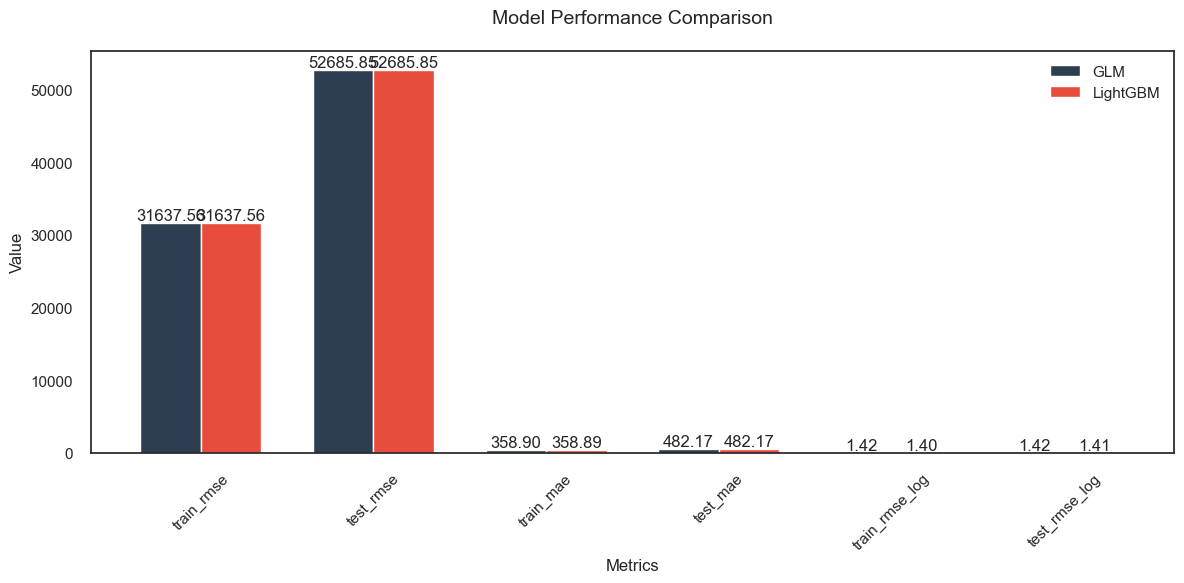

In [96]:
import matplotlib.pyplot as plt

def plot_model_comparison(glm_results, lgb_results):
    # Prepare data
    metrics = ['train_rmse', 'test_rmse', 'train_mae', 'test_mae', 'train_rmse_log', 'test_rmse_log']
    
    # Create comparison dataframe
    comparison_data = []
    for metric in metrics:
        comparison_data.append({
            'metric': metric,
            'GLM': glm_results[metric],
            'LightGBM': lgb_results[metric]
        })
    df_comparison = pd.DataFrame(comparison_data)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot metrics
    x = np.arange(len(metrics))
    width = 0.35
    
    plt.bar(x - width/2, df_comparison['GLM'], width, label='GLM', color='#2C3E50')
    plt.bar(x + width/2, df_comparison['LightGBM'], width, label='LightGBM', color='#E74C3C')
    
    plt.title('Model Performance Comparison', fontsize=14, pad=20)
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.xticks(x, metrics, rotation=45)
    plt.legend()
    
    # Add value labels
    for i in x:
        plt.text(i - width/2, df_comparison['GLM'][i], f'{df_comparison["GLM"][i]:.2f}', 
                ha='center', va='bottom')
        plt.text(i + width/2, df_comparison['LightGBM'][i], f'{df_comparison["LightGBM"][i]:.2f}', 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

plot_model_comparison(glm_results, lgb_results)

## 12.9 Feature Importance Plots

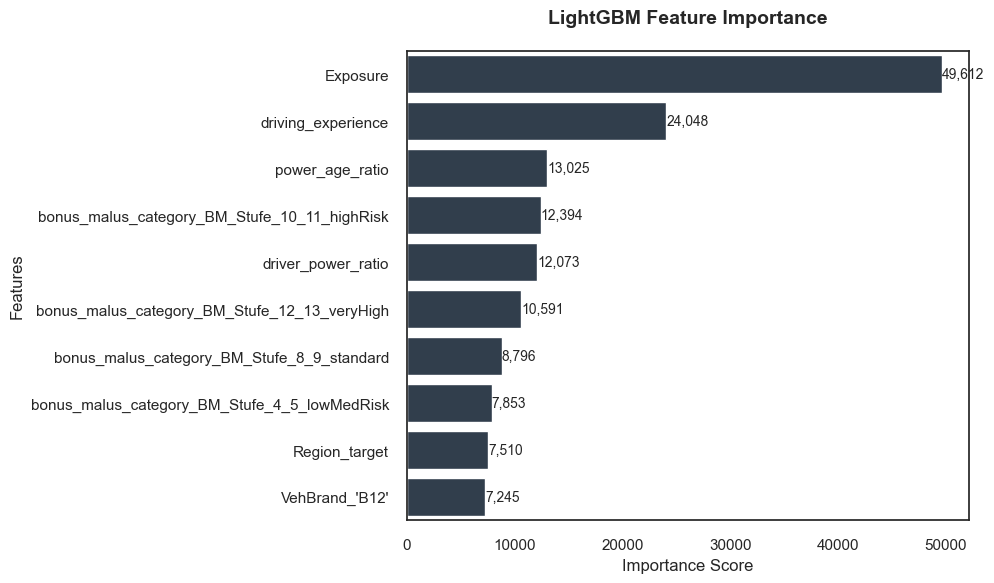

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importance(importance_df, title="Feature Importance Analysis", top_n=10):
    # Get top N features
    plot_data = importance_df.nlargest(top_n, 'importance').copy()
    
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Create horizontal bar plot
    sns.barplot(
        data=plot_data,
        y='feature',
        x='importance',
        color='#2C3E50'  # Dark blue color
    )
    
    # Customize appearance
    plt.title(title, pad=20, fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    
    # Add value labels on bars
    for i, v in enumerate(plot_data['importance']):
        plt.text(v, i, f'{v:,.0f}', va='center', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    return plt

# For LightGBM results
importance_df = pd.DataFrame({
    'feature': lgb_model.feature_name(),
    'importance': lgb_model.feature_importance('gain')
}).sort_values('importance', ascending=False)

# Create plot
plt = plot_feature_importance(importance_df, "LightGBM Feature Importance")
plt.show()

## Weitere Optimierungsvorschläge

### 1. Erweitertes Feature Engineering
* Komplexe Interaktionsterme (zB DriveAge und VehPower)
* Regionale Risiko-Scores (Density + Region)

### 2. Modell
* Implementierung eines zweistufigen Modells:
 * Erstes Modell zur Vorhersage der ClaimProbability
 * Zweites Modell zur Vorhersage der ClaimAmount (nur für Fälle wo Schäden entstanden sind)
 *  Damit könnten wir näher zum tatsächlichen Versicherungsprozess sein
* Implementierung anderer Modelle
 * XGBoost
 * CatBoost
 * Neuronale Netzwerke

### 3. Validierung
* k-fold Cross-Validation mit Stratifizierung -> Overfitting vermeiden
* Modellstabilität prüfen über Untergruppen (zB Fahreraltersgruppen)

### 4. Geschäftlich
* Berücksichtigung regulatorischer Anforderungen bei der Feature-Auswahl
* Existiende Modelle als Baseline nehmen, die in der Versicherung verwendet werden